# Plot Customisation with `doped`

In [ ]:
# Install doped (if not already installed)
!pip install doped

All the plotting functions in `doped` are made to be as customisable as possible, and also return the `Matplotlib` `Figure` object, so that you can further customise the plot as you see fit. 

## CdTe Formation Energy Plotting

In [1]:
%matplotlib inline
from monty.serialization import loadfn
CdTe_thermo = loadfn("CdTe/CdTe_thermo_wout_meta.json")  # load our DefectThermodynamics object

Basic formation energy plot:

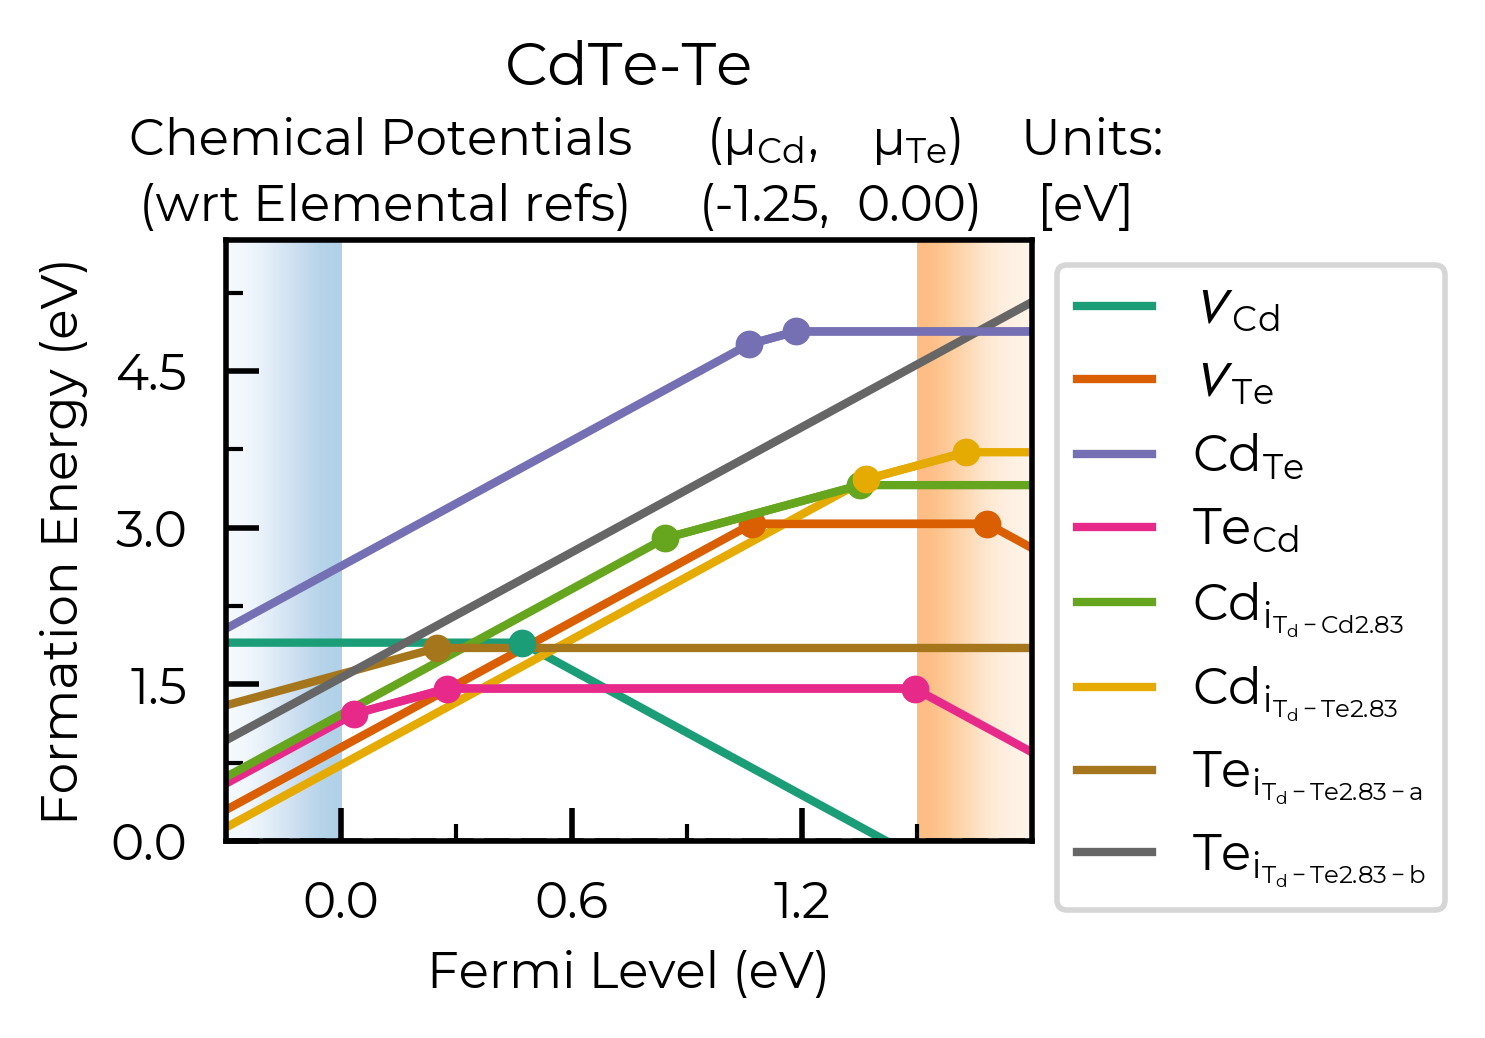

In [3]:
plot = CdTe_thermo.plot(facet="Te-rich")  

In [18]:
# run this cell to see the possible arguments for this function (or go to the python API documentation)
CdTe_thermo.plot?

### `dist_tol`

In the above plot, we see `doped` classified Te interstitials into having two separate defect sites. This is dictated by the `dist_tol` parameter in `DefectThermodynamics` (= 1.5 Å by default), which groups together defects which have distances between equivalent defect sites within this tolerance. 
In this case, this is because Te interstitials adopt [split-interstitial dimer structures](https://pubs.rsc.org/en/content/articlelanding/2022/fd/d2fd00043a) for the +1 and neutral charge states, but a different conventional interstitial type structure for the +2 charge state.  
Let's increase it to 2 Å here to group these Te interstitials together:

In [2]:
CdTe_thermo.get_equilibrium_concentrations(facet="Te-rich", temperature=300, fermi_level=0.5)

Defect Charge  Formation Energy (eV) Concentration (cm^-3)  \
0             v_Cd      0                  1.899             1.094e-09   
1             v_Cd     -1                  1.941             2.802e-10   
2             v_Cd     -2                  1.838             1.873e-09   
3             v_Te     +2                  1.896             2.002e-10   
4             v_Te     +1                  3.085             4.252e-30   
5             v_Te      0                  3.038             7.921e-29   
6             v_Te     -1                  4.442             8.280e-52   
7             v_Te     -2                  5.402             3.059e-68   
8            Cd_Te     +2                  3.632             1.387e-39   
9            Cd_Te     +1                  4.194             5.913e-48   
10           Cd_Te      0                  4.879             1.864e-59   
11           Cd_Te     -1                  6.231             6.121e-83   
12           Cd_Te     -2                  7.614            4.208e-105   
13           Te_Cd     +2                  2.148             1.179e-14   
14           Te_Cd     +1                  1.682             6.274e-06   
15           Te_Cd      0                  1.459             1.751e-02   
16           Te_Cd     -1                  2.486             5.927e-19   
17           Te_Cd     -2                  3.446             2.226e-35   
18  Cd_i_Td_Cd2.83     +2                  2.211             1.027e-15   
19  Cd_i_Td_Cd2.83     +1                  2.555             3.385e-21   
20  Cd_i_Td_Cd2.83      0                  3.407             8.250e-36   
21  Cd_i_Td_Te2.83     +2                  1.728             1.345e-07   
22  Cd_i_Td_Te2.83     +1                  2.595             7.188e-22   
23  Cd_i_Td_Te2.83      0                  3.722             4.190e-41   
24  Te_i_Td_Te2.83     +2                  2.563             1.505e-20   
25  Te_i_Td_Te2.83     +1                  2.098             9.767e-13   
26  Te_i_Td_Te2.83      0                  1.848             1.568e-08   
27  Te_i_Td_Te2.83     -1                  3.961             9.722e-44   
28  Te_i_Td_Te2.83     -2                  6.597             2.536e-88   

   Charge State Population  
0                    33.7%  
1                     8.6%  
2                    57.7%  
3                   100.0%  
4                     0.0%  
5                     0.0%  
6                     0.0%  
7                     0.0%  
8                   100.0%  
9                     0.0%  
10                    0.0%  
11                    0.0%  
12                    0.0%  
13                    0.0%  
14                    0.0%  
15                  100.0%  
16                    0.0%  
17                    0.0%  
18                  100.0%  
19                    0.0%  
20                    0.0%  
21                  100.0%  
22                    0.0%  
23                    0.0%  
24                    0.0%  
25                    0.0%  
26                  100.0%  
27                    0.0%  
28                    0.0%

In [4]:
CdTe_thermo.get_equilibrium_concentrations(facet="Te-rich", per_charge=False, fermi_level=0.5)

Concentration (cm^-3)
Defect                              
Cd_Te                      1.387e-39
Cd_i_Td_Cd2.83             1.027e-15
Cd_i_Td_Te2.83             1.345e-07
Te_Cd                      1.752e-02
Te_i_Td_Te2.83             1.568e-08
v_Cd                       3.247e-09
v_Te                       2.002e-10

In [5]:
CdTe_thermo.dist_tol=10
CdTe_thermo.get_equilibrium_concentrations(facet="Te-rich", per_charge=False, fermi_level=0.5)

Concentration (cm^-3)
Defect                              
Cd_Te                      1.387e-39
Cd_i_Td_Cd2.83             1.027e-15
Cd_i_Td_Te2.83             1.345e-07
Te_Cd                      1.752e-02
Te_i_Td_Te2.83             1.568e-08
v_Cd                       3.247e-09
v_Te                       2.002e-10

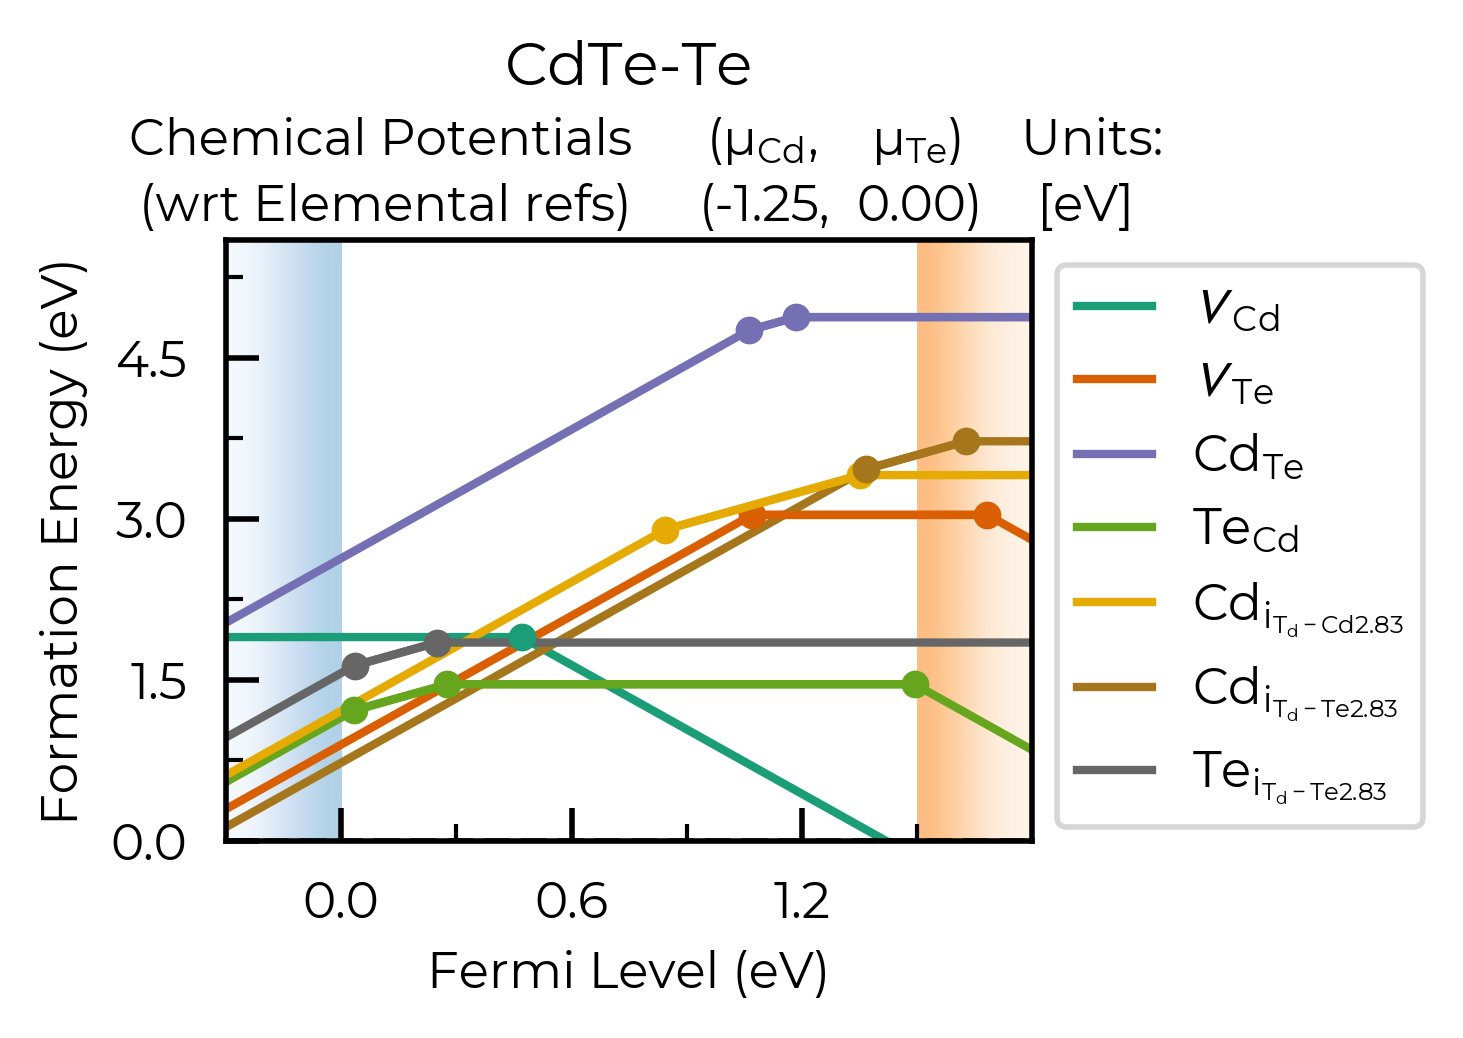

In [2]:
CdTe_thermo.dist_tol = 2
plot = CdTe_thermo.plot(facet="Te-rich")  

If we had many inequivalent defects in a system (e.g. in low-symmetry/complex systems such as [Sb₂Se₃](https://arxiv.org/abs/2402.04434)), we can set `dist_tol` to a high value to merge together these many inequivalent defects so that our formation energy plot just shows the lowest energy species of each defect type. 

### `all_entries`

We can set `all_entries = True` to show the full formation energy lines for all defect species, not just the lowest energy charge states. This can be useful for analysing metastable defect states, but can also be quite messy when we are plotting many defects at once. 
For this case, let's trim down to just the Cd vacancy defects:

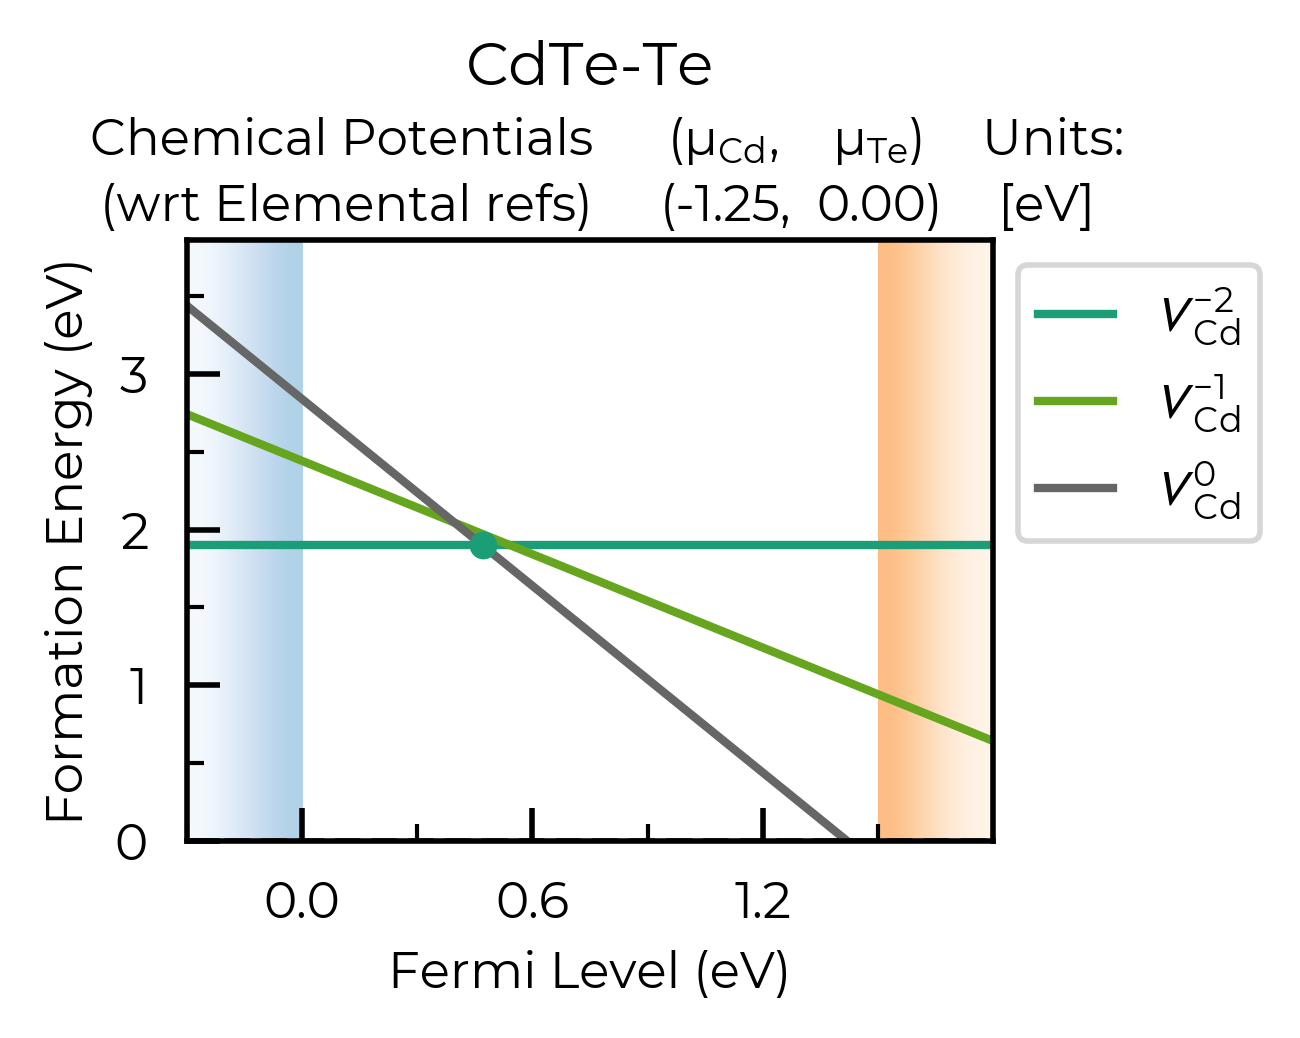

In [6]:
from doped.thermodynamics import DefectThermodynamics
v_Cd_thermo = DefectThermodynamics(
    [entry for entry in CdTe_thermo.defect_entries if "v_Cd" in entry.name], 
    chempots=CdTe_thermo.chempots
)  # only Cd vacancy defects

fig = v_Cd_thermo.plot(all_entries=True, facet="Te-rich")

We can instead set `all_entries = "faded"` to show the full formation energy lines for all defect species, but with all metastable states faded out in grey:

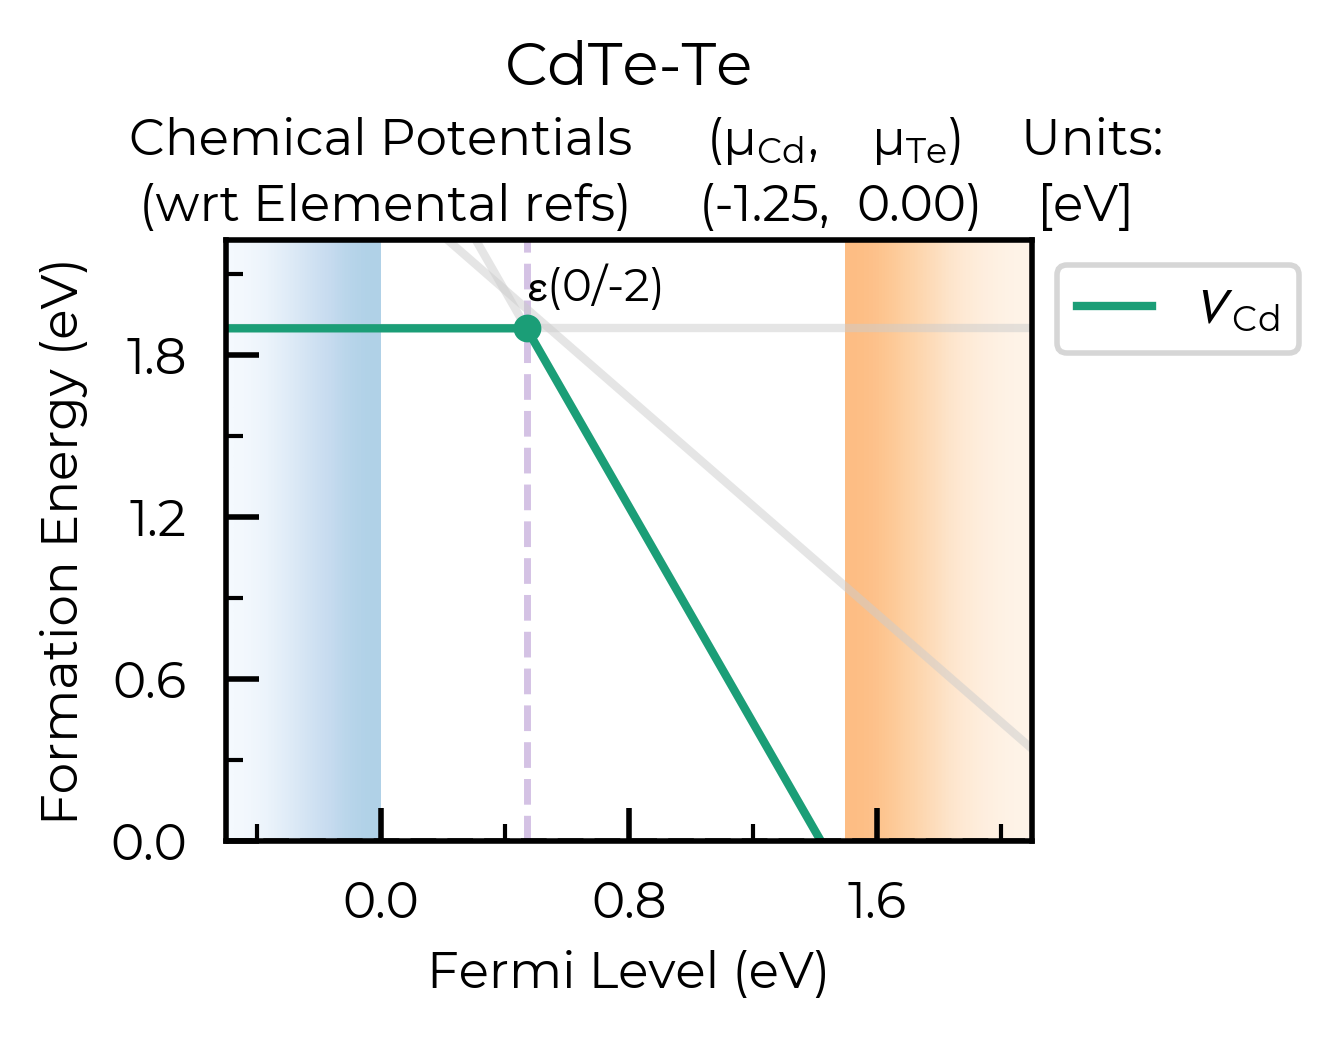

In [7]:
fig = v_Cd_thermo.plot( 
    auto_labels=True,
    xlim=(-0.5, 2.1),
    all_entries="faded",
    facet="Te-rich",
)
ax = fig.gca()
ax.axvline(0.47, ls="--", c="C4", alpha=0.4, zorder=-1)  # add a vertical line at the transition level

### `chempots` & `el_refs`

We can also set the chemical potentials to be used in the plot directly in the plotting function (or can of course adjust `DefectThermodynamics.chempots/el_refs` directly):

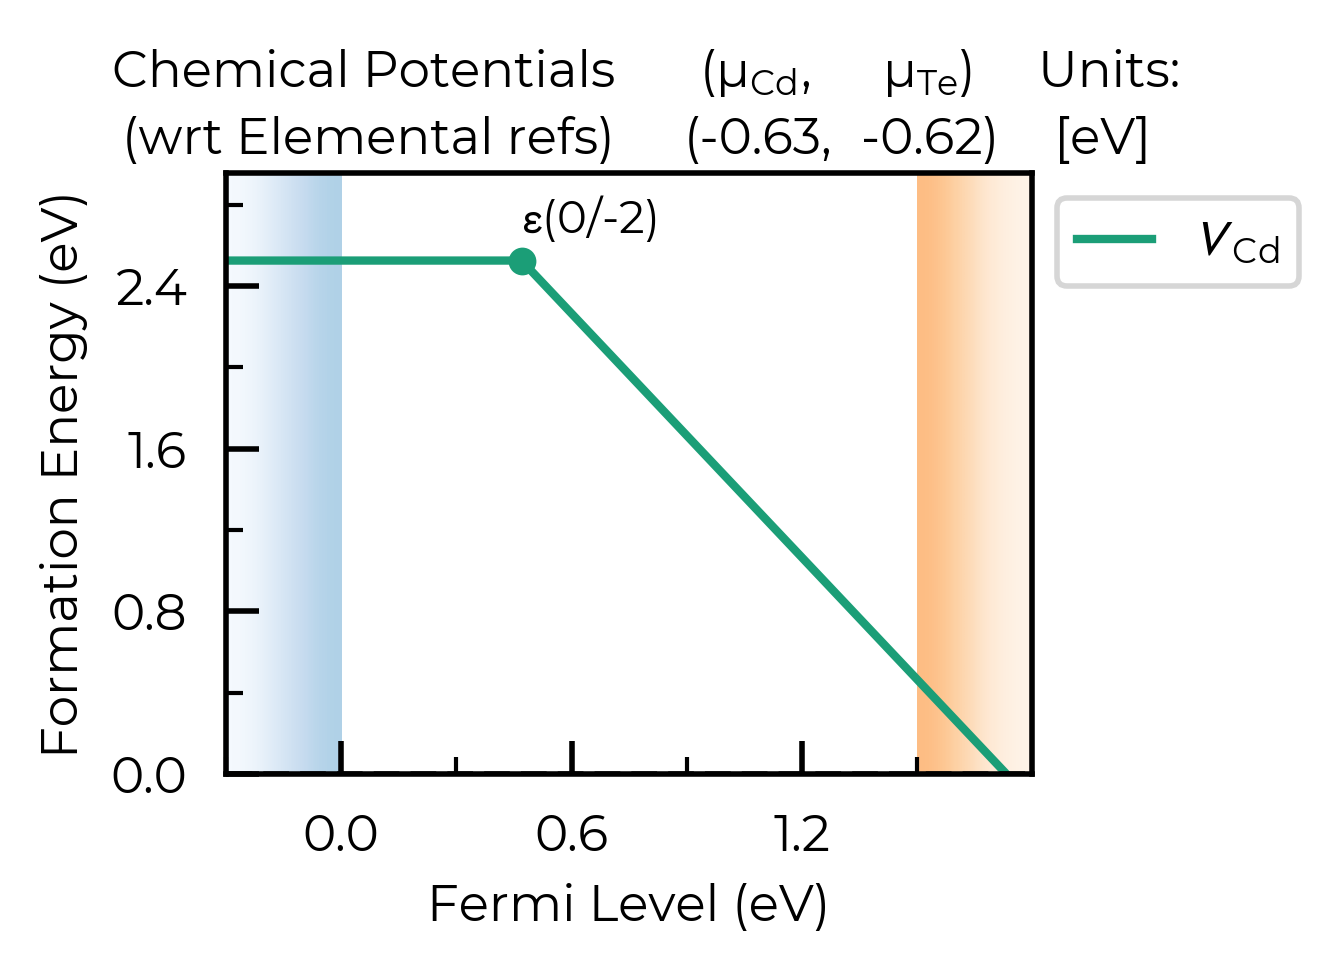

In [8]:
# we can always set/overwrite `chempots` in the plotting/tabulation functions like this too:
def_plot = v_Cd_thermo.plot(
    chempots = {"Cd": -0.6255, "Te": -0.625},  # midpoint between Te/Cd-rich  
    el_refs=CdTe_thermo.chempots.get("elemental_refs"),
    auto_labels=True,
)

### `facet`

The `facet` parameter specifies the phase diagram facet (chemical potential limit) to for which to
plot formation energies. This can be either:
- `None`, in which case plots are generated for all facets in ``chempots``.
- "X-rich"/"X-poor" where X is an element in the system, in which case the most X-rich/poor facet will be used (e.g. "Li-rich").
- A key in the ``(DefectThermodynamics.)chempots["facets"]`` dictionary.

The latter two options can only be used if ``chempots`` is in the `doped` format (see chemical potentials tutorial). 

In [9]:
# print the chemical potential facets
print(CdTe_thermo.chempots["facets"].keys())

dict_keys(['Cd-CdTe', 'CdTe-Te'])


In this case, we can plot the Cd-rich facet by setting `facet="Cd-rich"`, `facet="Cd-CdTe"` (the Cd-rich facet here) or by just manually setting the chemical potentials to this limit:

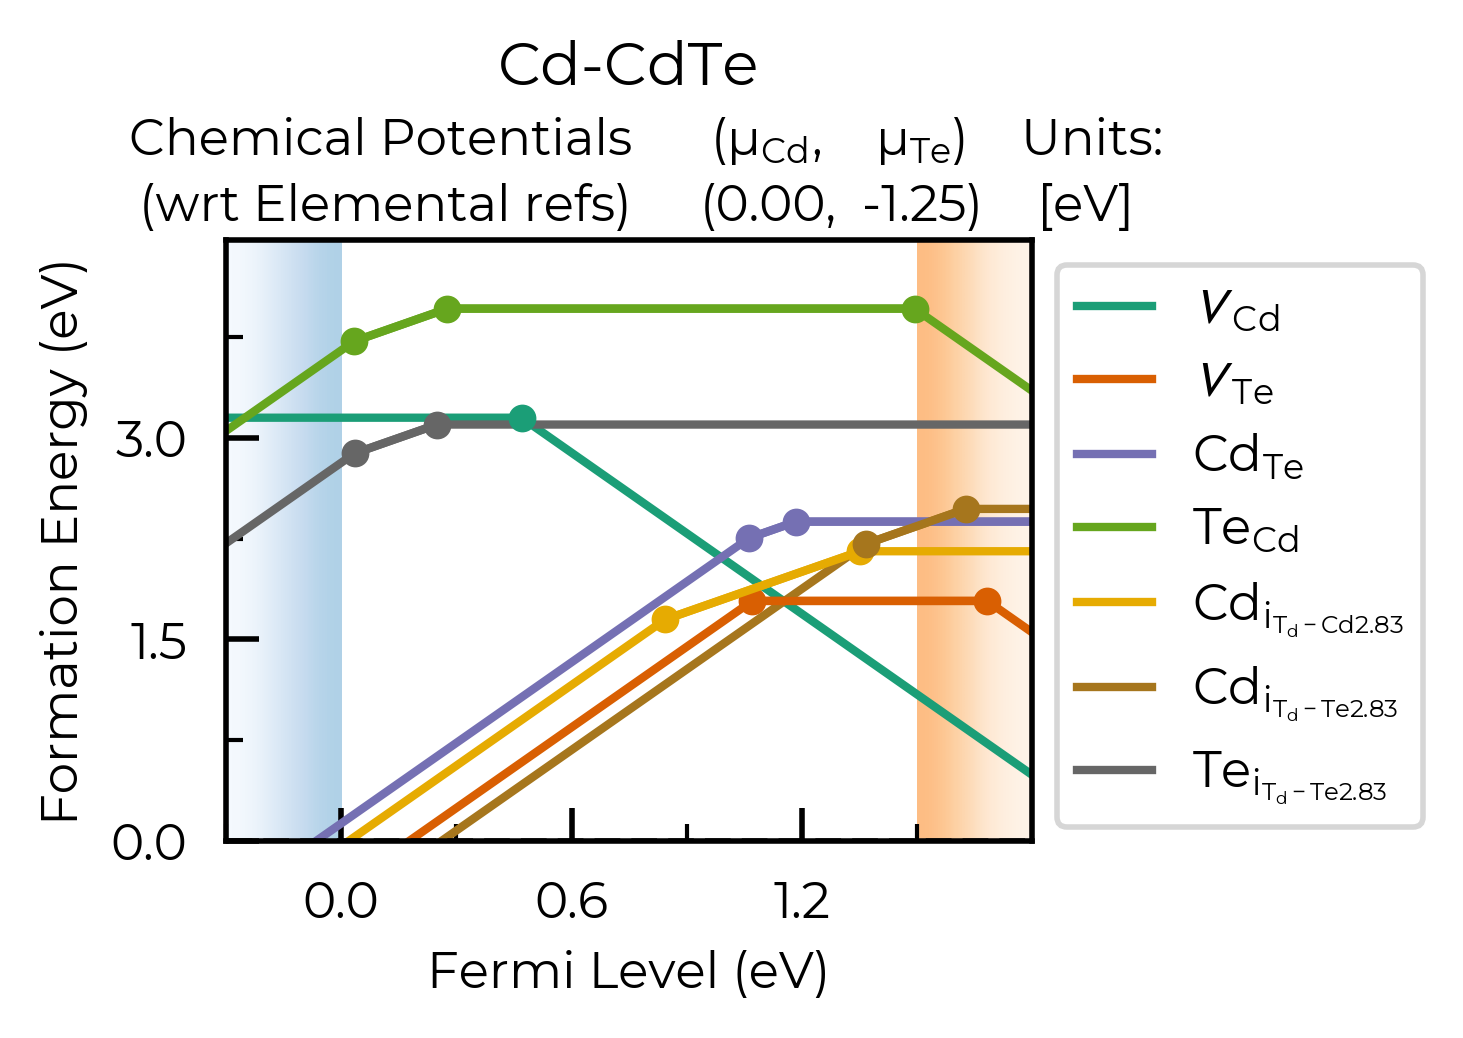

In [10]:
def_plot = CdTe_thermo.plot(facet="Cd-CdTe")

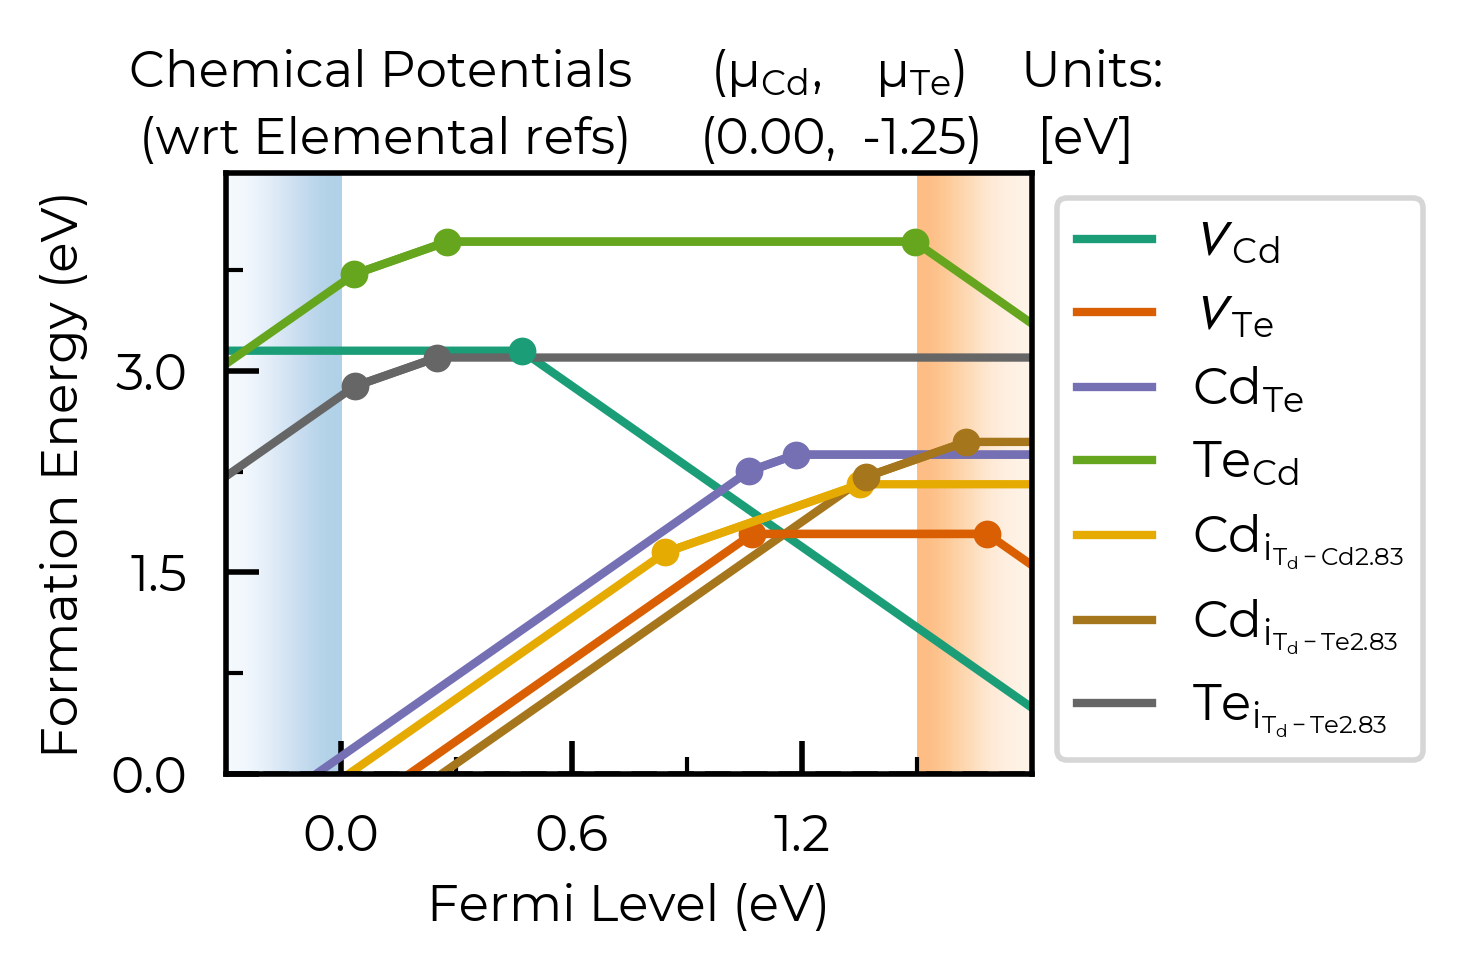

In [11]:
# manual Cd-rich chempots:
def_plot = CdTe_thermo.plot(
    chempots=CdTe_thermo.chempots["facets_wrt_el_refs"]["Cd-CdTe"],
    el_refs=CdTe_thermo.chempots["elemental_refs"]
)

### `colormap`

We can set different (qualitative) colour maps for the plots. This can be a string name of a `Matplotlib` colormap (see [here](https://matplotlib.org/stable/users/explain/colors/colormaps.html#qualitative)), or a `Colormap` object:

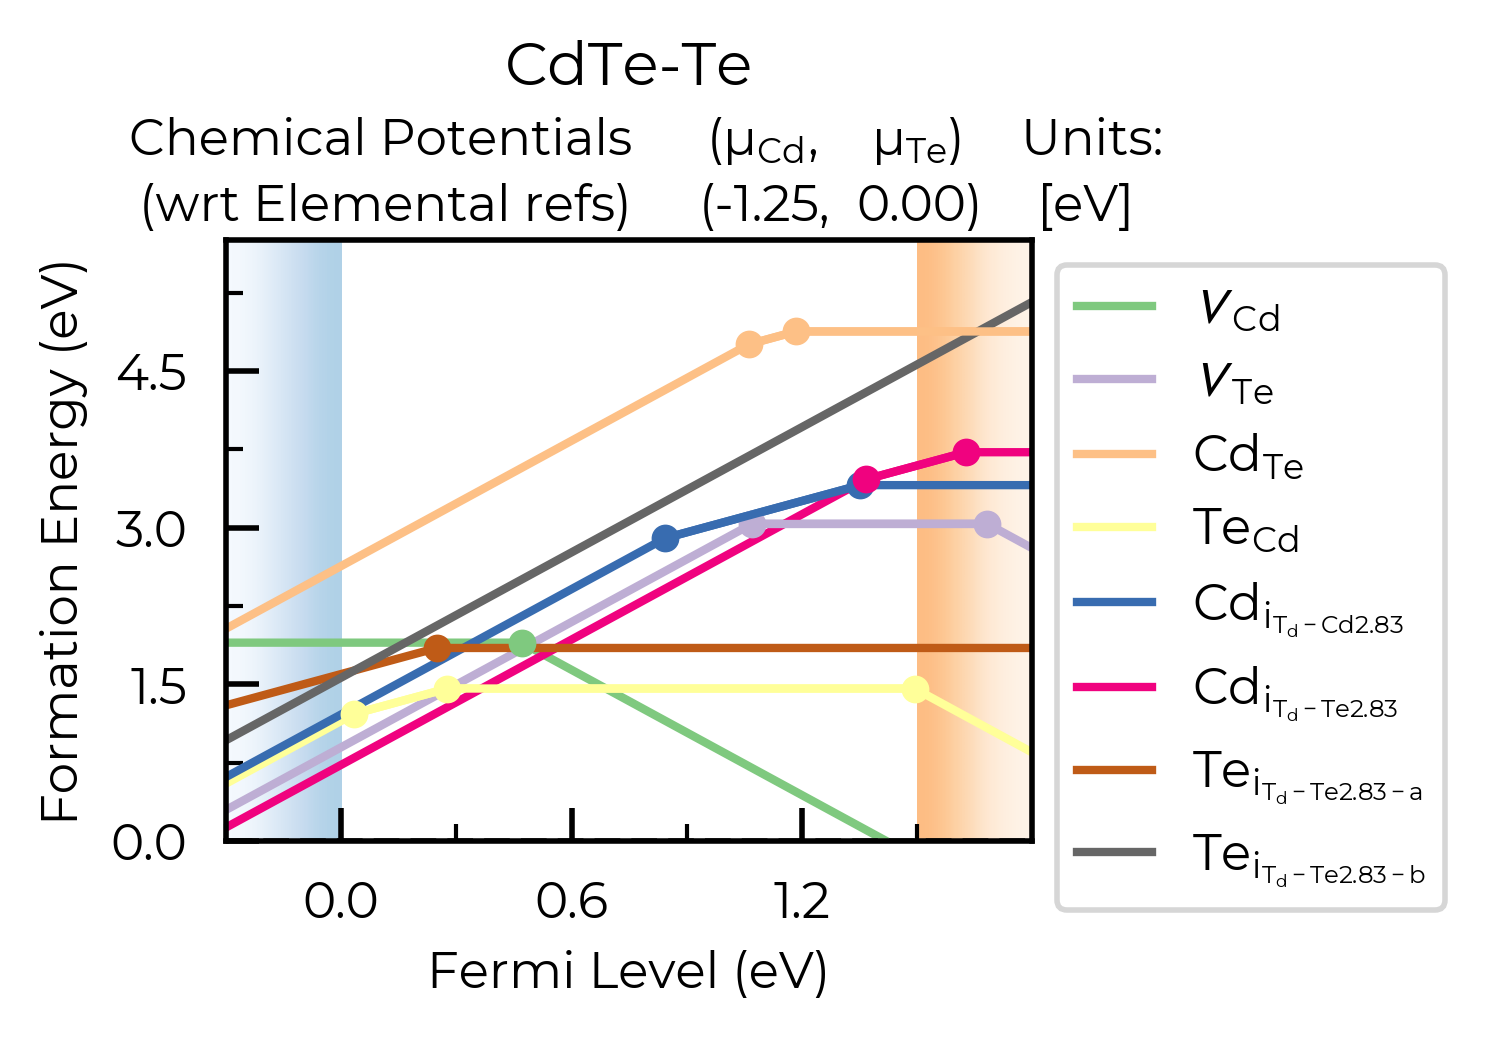

In [29]:
plot = CdTe_thermo.plot(facet="Te-rich", colormap="Accent")  

In [33]:
from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(["#D4447E", "#E9A66C", "#507BAA", "#5FABA2", "#63666A", "#A3A3A3", "#FFD700"])

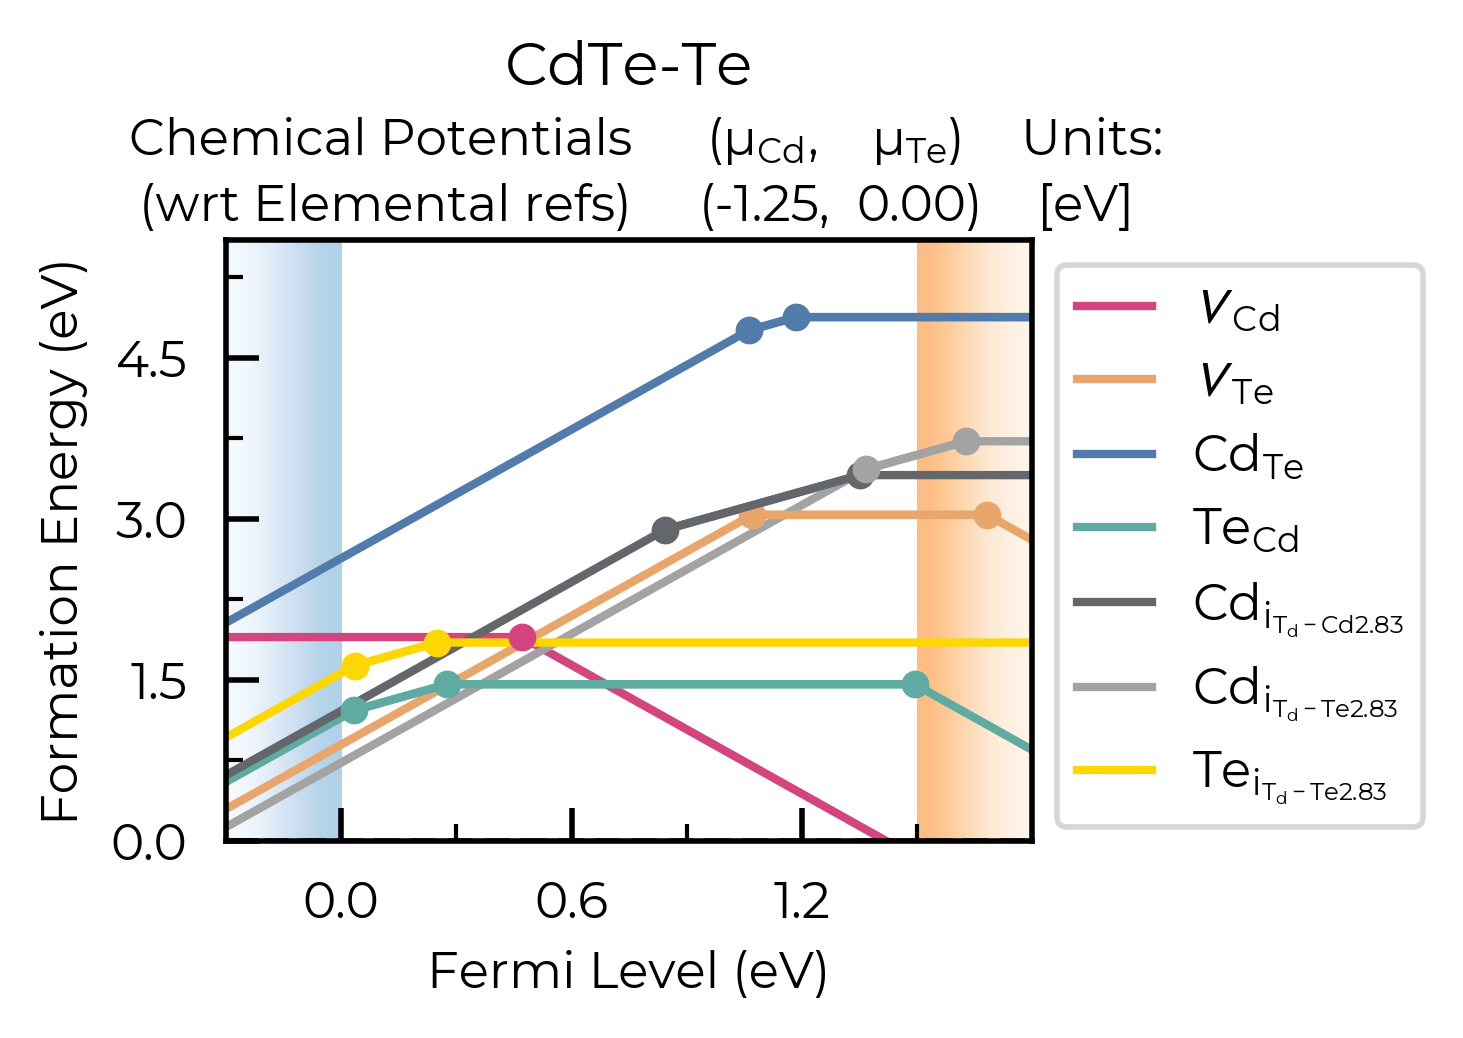

In [37]:
plot = CdTe_thermo.plot(facet="Te-rich", colormap=custom_cmap)  

### `style_file`

We can adjust the overall style of the plot by using a custom `matplotlib` style (`mplstyle`) file:

In [3]:
with open("custom_style.mplstyle", "w") as f:
    f.write("ytick.right : True\nxtick.top : True\nfont.sans-serif : Helvetica")

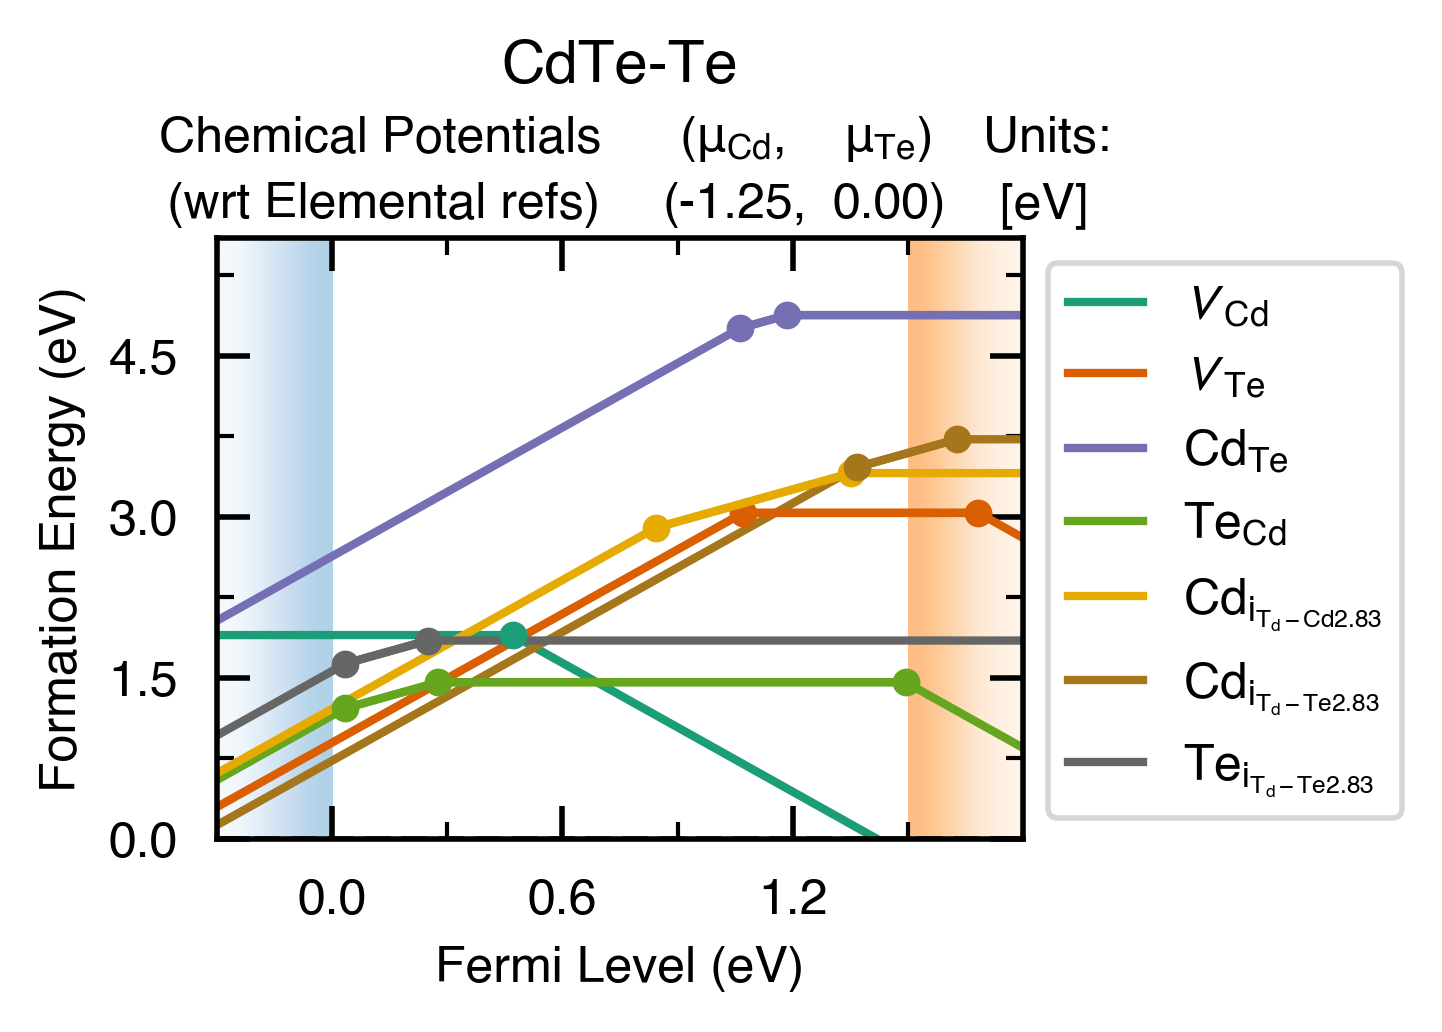

In [4]:
plot = CdTe_thermo.plot(facet="Te-rich", style_file="custom_style.mplstyle")  

### `auto_labels`

We can include automatic labels for the transition levels:
(as you can see, these get very messy when we are plotting many defects, so usually best to use only with a small number of defects)

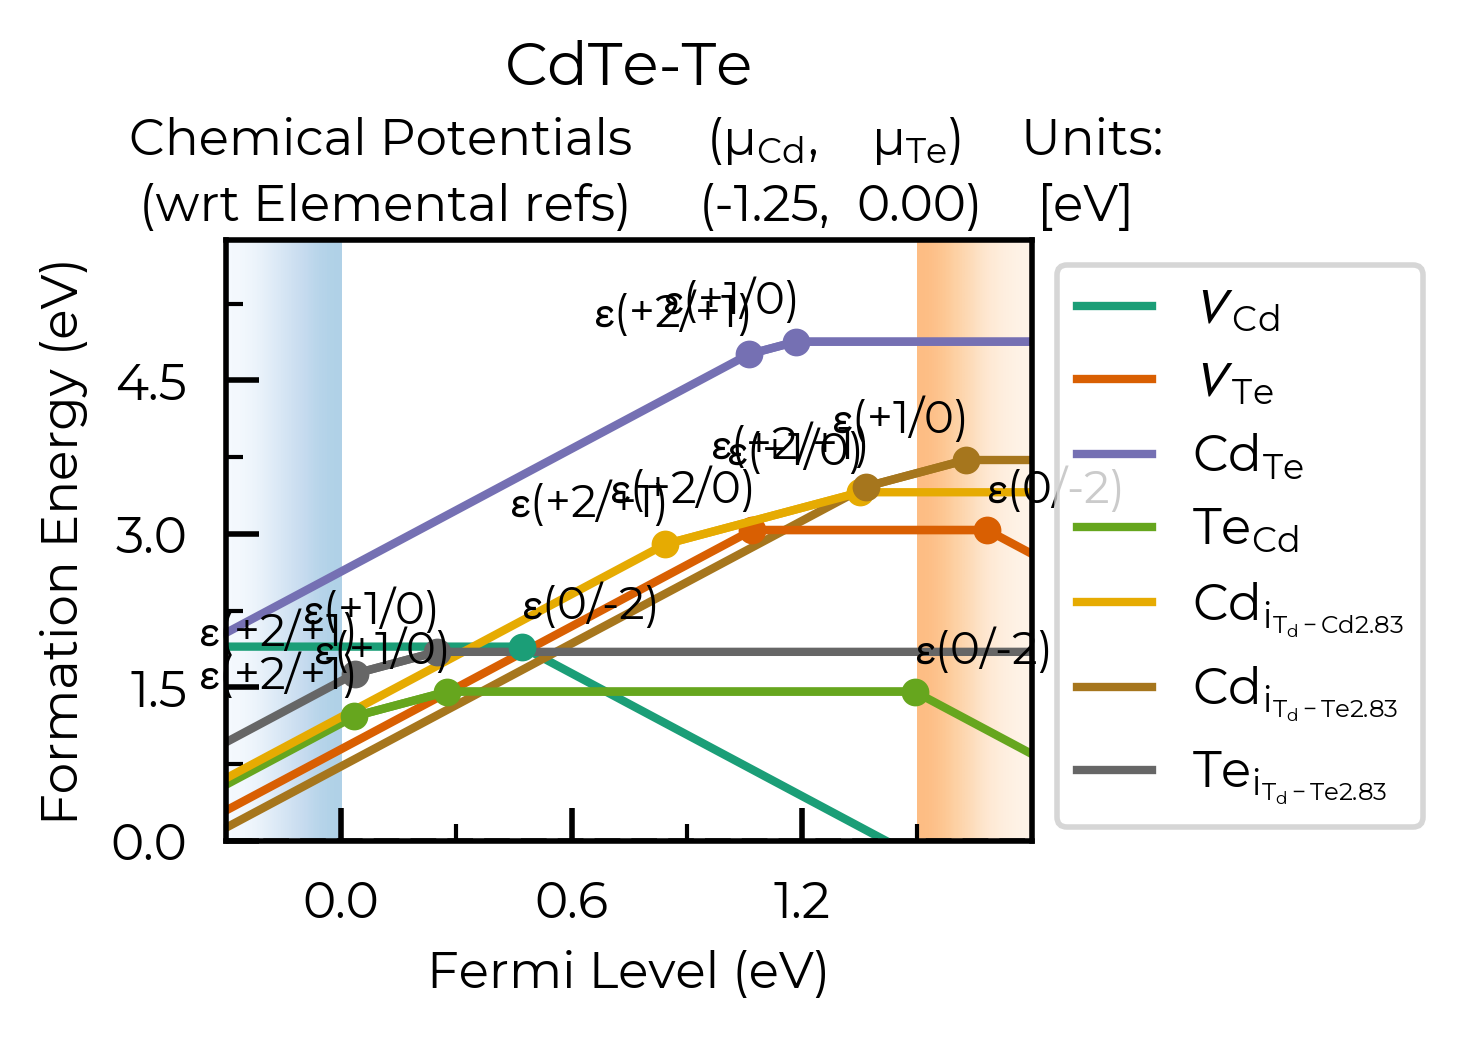

In [23]:
plot = CdTe_thermo.plot(facet="Te-rich", auto_labels=True)  

### `chempot_table`

We can control whether or not to show the chemical potentials above the plot:

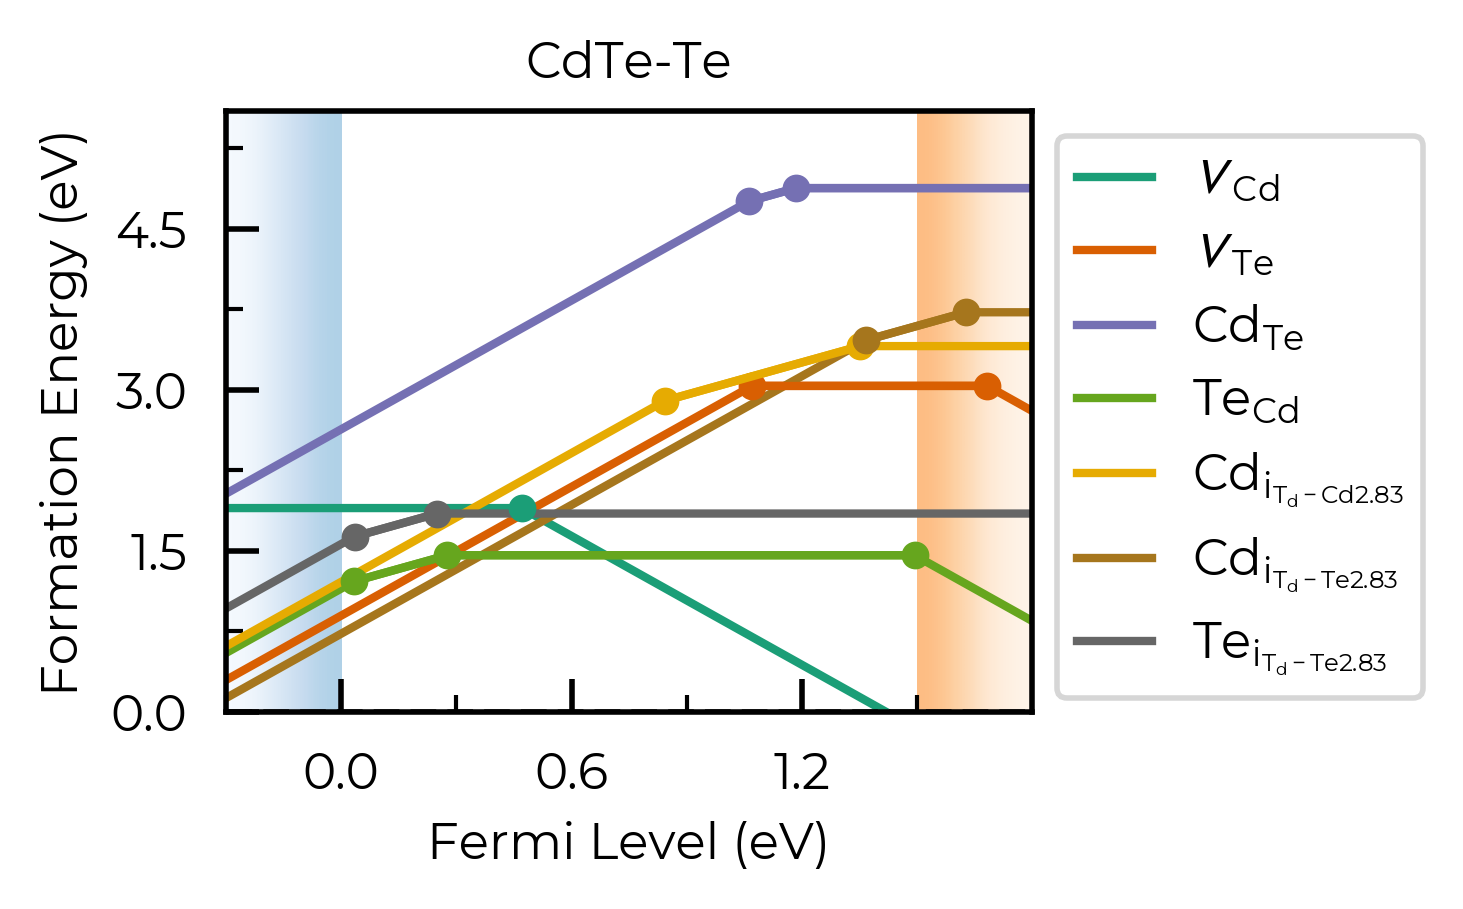

In [19]:
plot = CdTe_thermo.plot(facet="Te-rich", chempot_table=False)  

### `xlim` & `ylim`

We can adjust the axis limits:

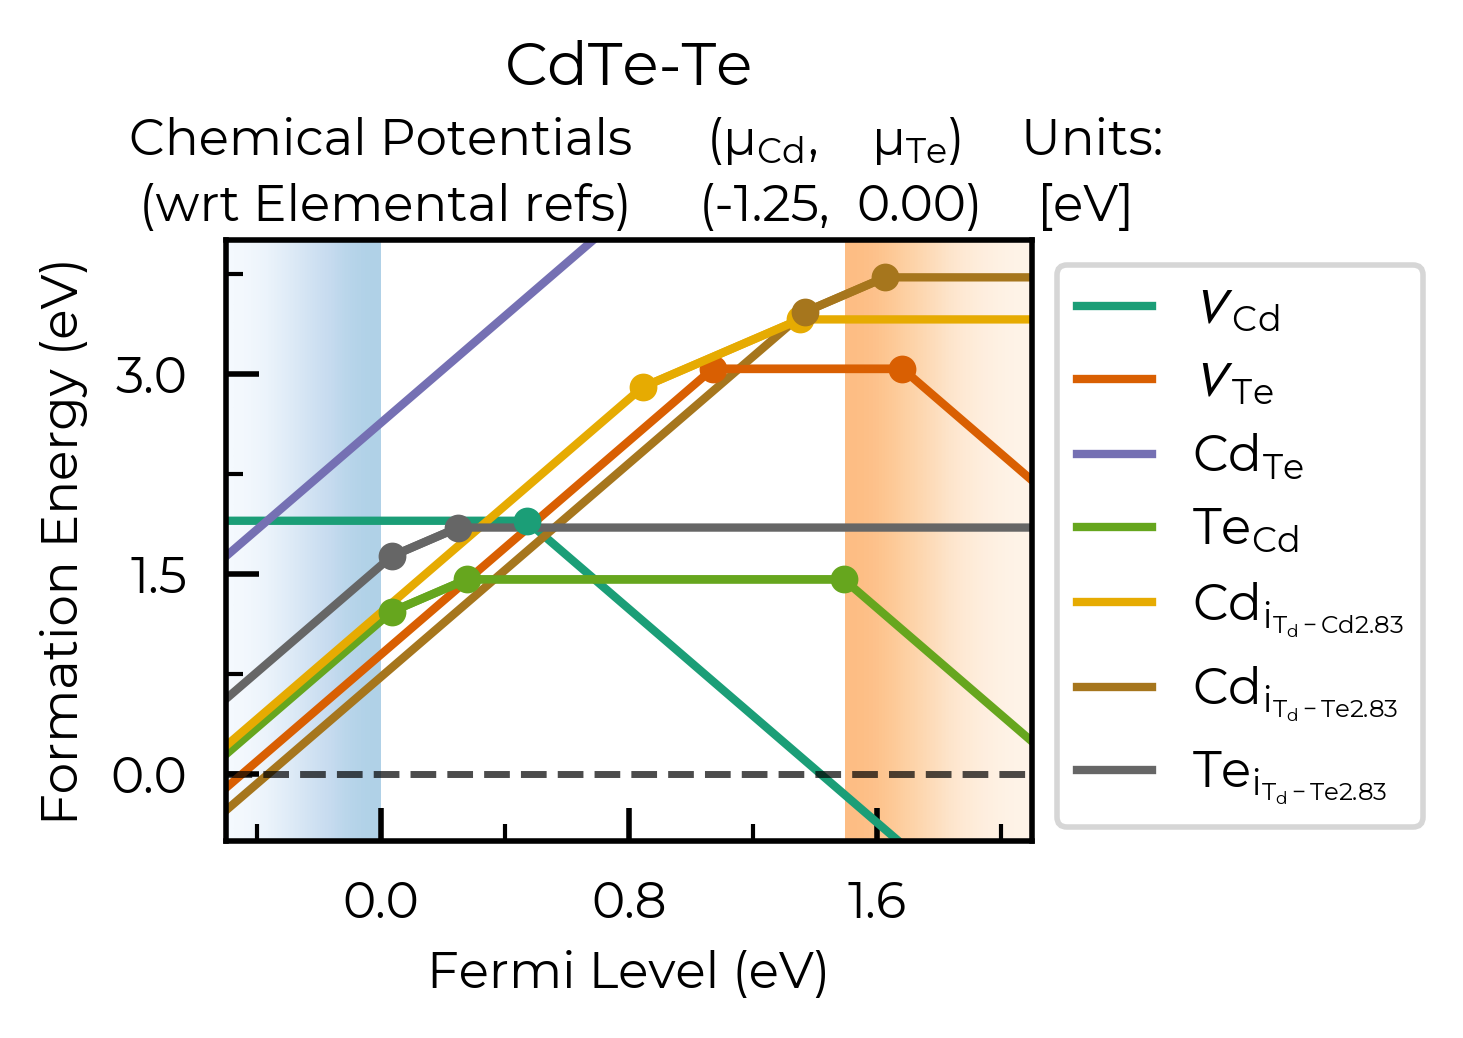

In [20]:
plot = CdTe_thermo.plot(facet="Te-rich", xlim=(-0.5, 2.1), ylim=(-0.5, 4.0))

### `fermi_level`

We can show a vertical line at the predicted Fermi level position (see the `doped` thermodynamics tutorial for details on how we might go about doing this):

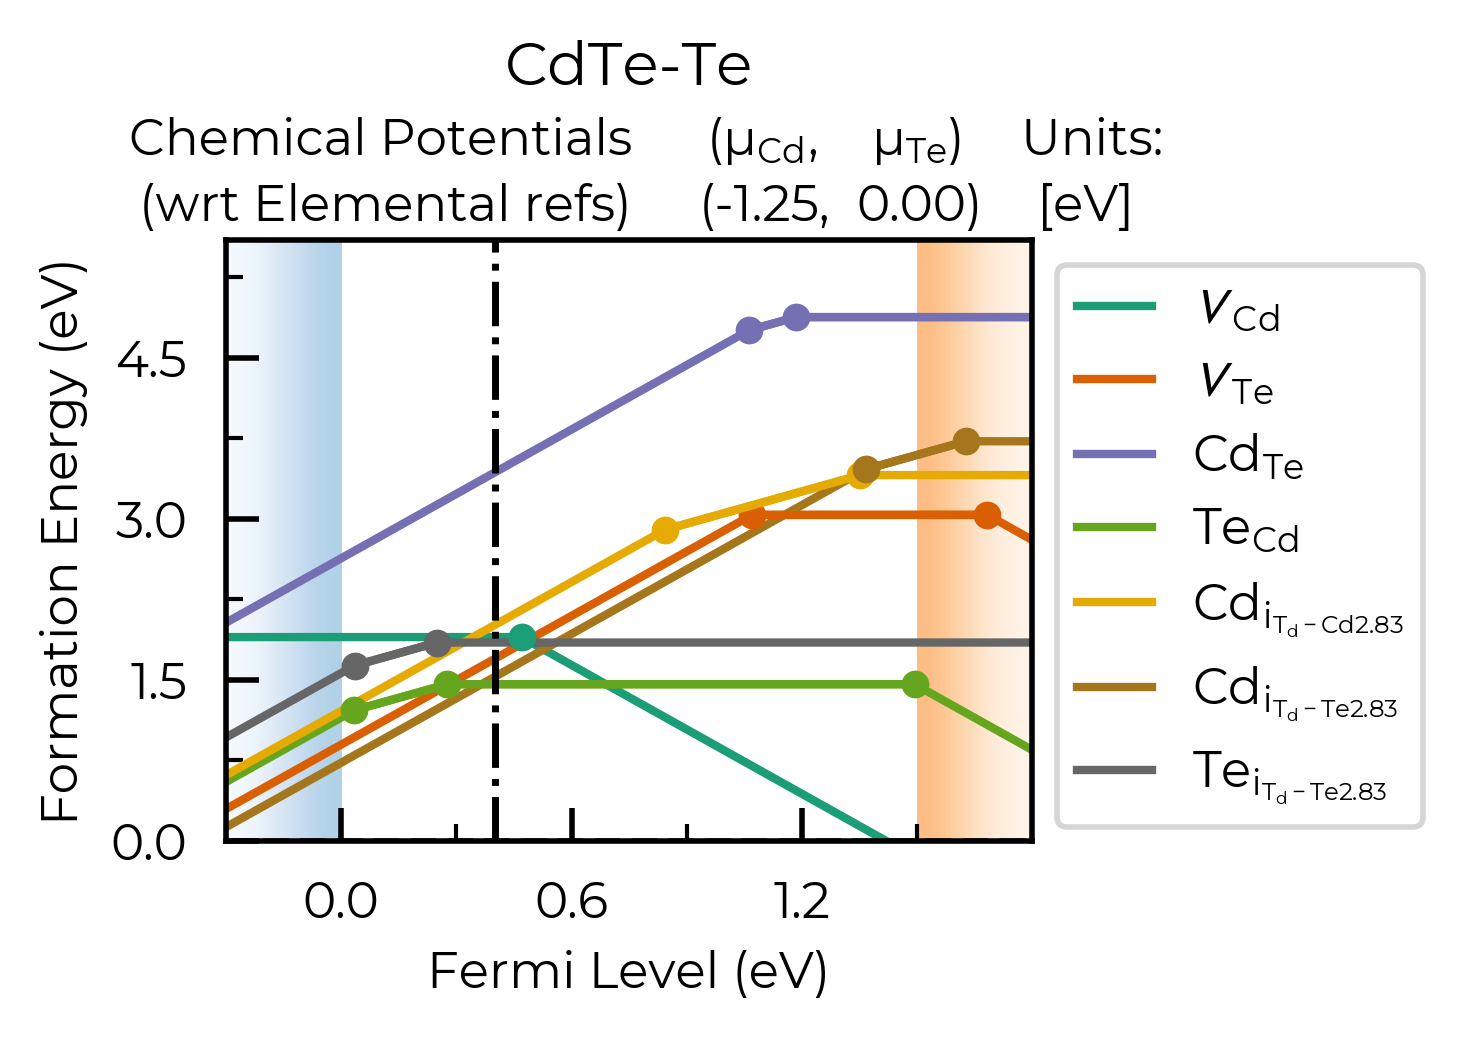

In [22]:
plot = CdTe_thermo.plot(facet="Te-rich", fermi_level=0.4)

### `filename`

We can set `filename` to save the plot to file:

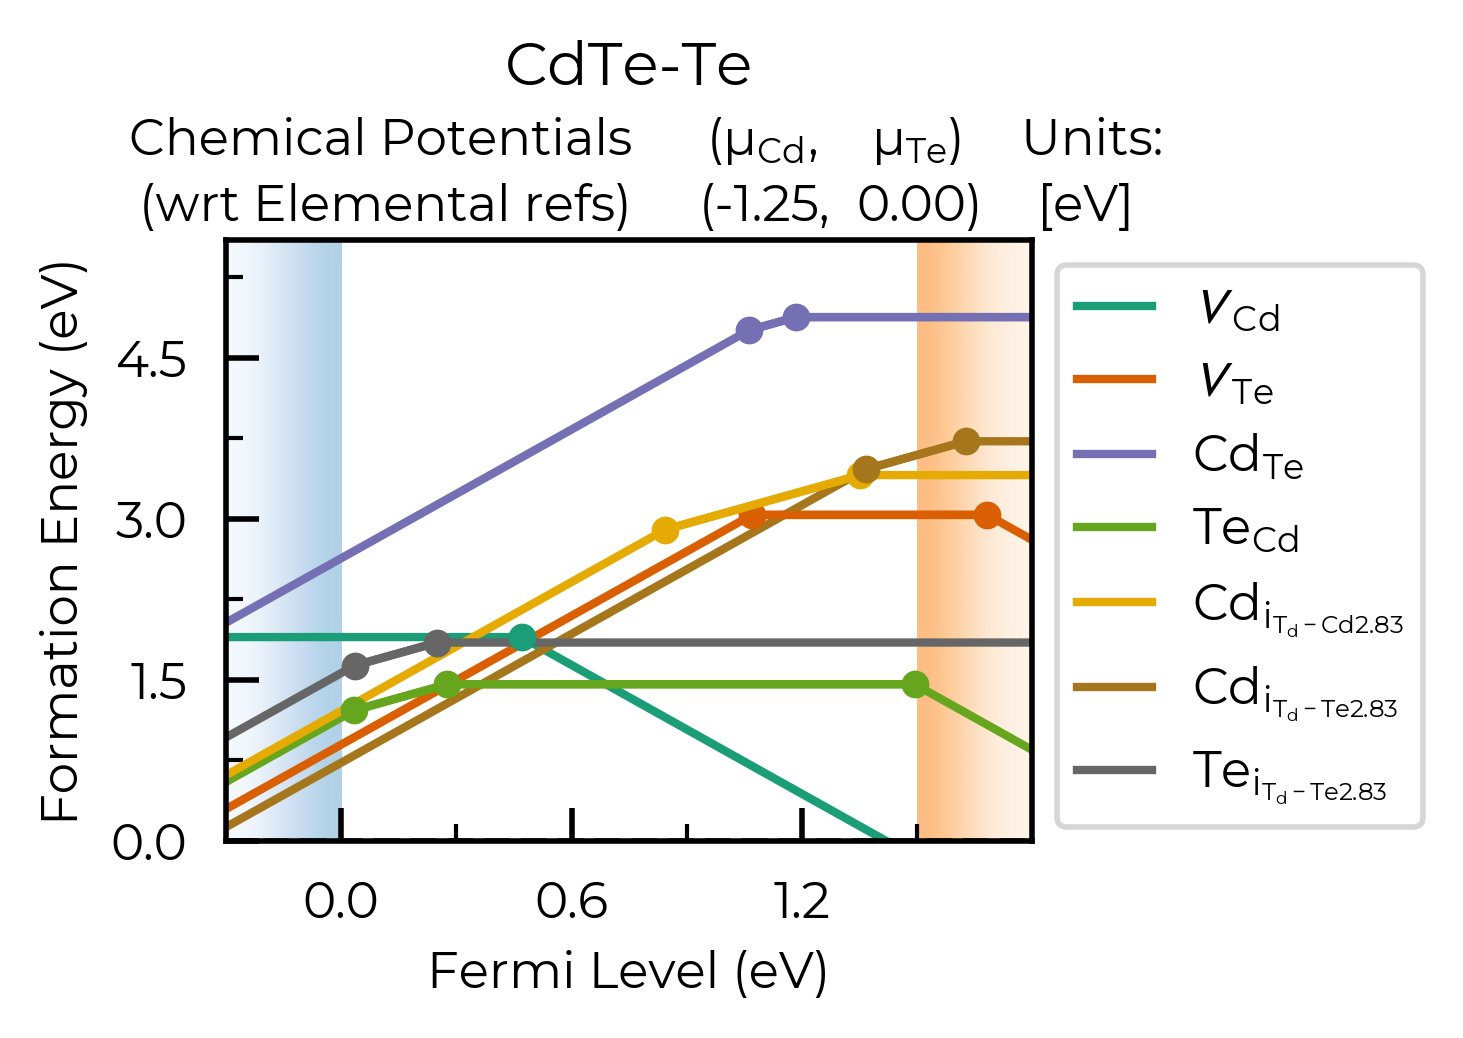

In [24]:
plot = CdTe_thermo.plot(facet="Te-rich", filename="CdTe_defects_plot.png")  

## Finite-Size Charge Correction Plots

Both the Freysoldt (FNV) and Kumagai (eFNV) charge correction plots in `doped` are also quite customisable, and as always return the `Matplotlib` `Figure` object to allow further customisation.

### eFNV (Kumagai) Correction

As shown in the `doped` docs [Tips page](https://doped.readthedocs.io/en/latest/Tips.html#layered-low-dimensional-materials), we can set `defect_region_radius` and/or `excluded_indices` with the eFNV correction (`get_kumagai_correction()`) to control which sites away from the defect site are used to determine the potential alignment – which we may want to do with e.g. low-dimensional materials.

In [2]:
te_cd_entry = [entry for entry in CdTe_thermo.defect_entries if entry.name == "Te_Cd_1"][0]

Calculated Kumagai (eFNV) correction is 0.238 eV


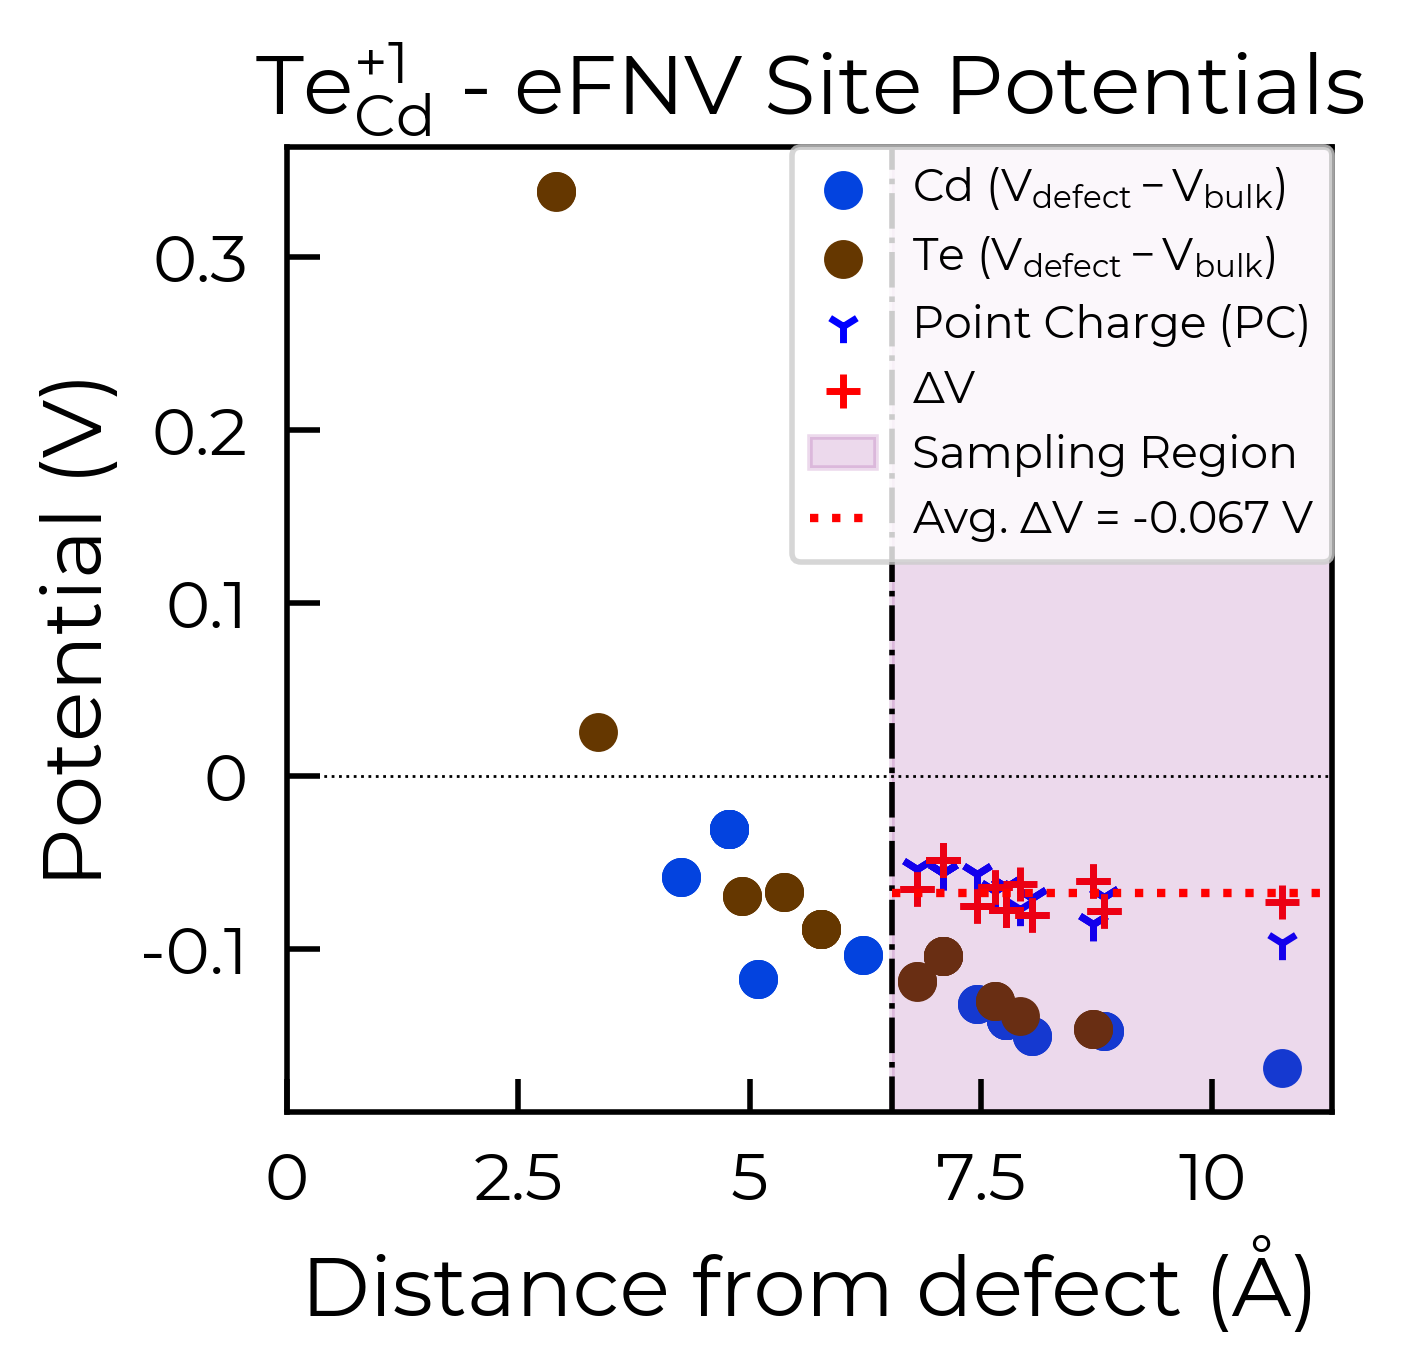

In [3]:
correction, plot = te_cd_entry.get_kumagai_correction(plot=True)

As with the defect formation energy plots, because this function also returns the `Matplotlib` `Figure` object, we can further customise the plot as we see fit. To illustrate, here we remove the legend from the plot and shade the region where the potential is positive in yellow:

Calculated Kumagai (eFNV) correction is 0.238 eV


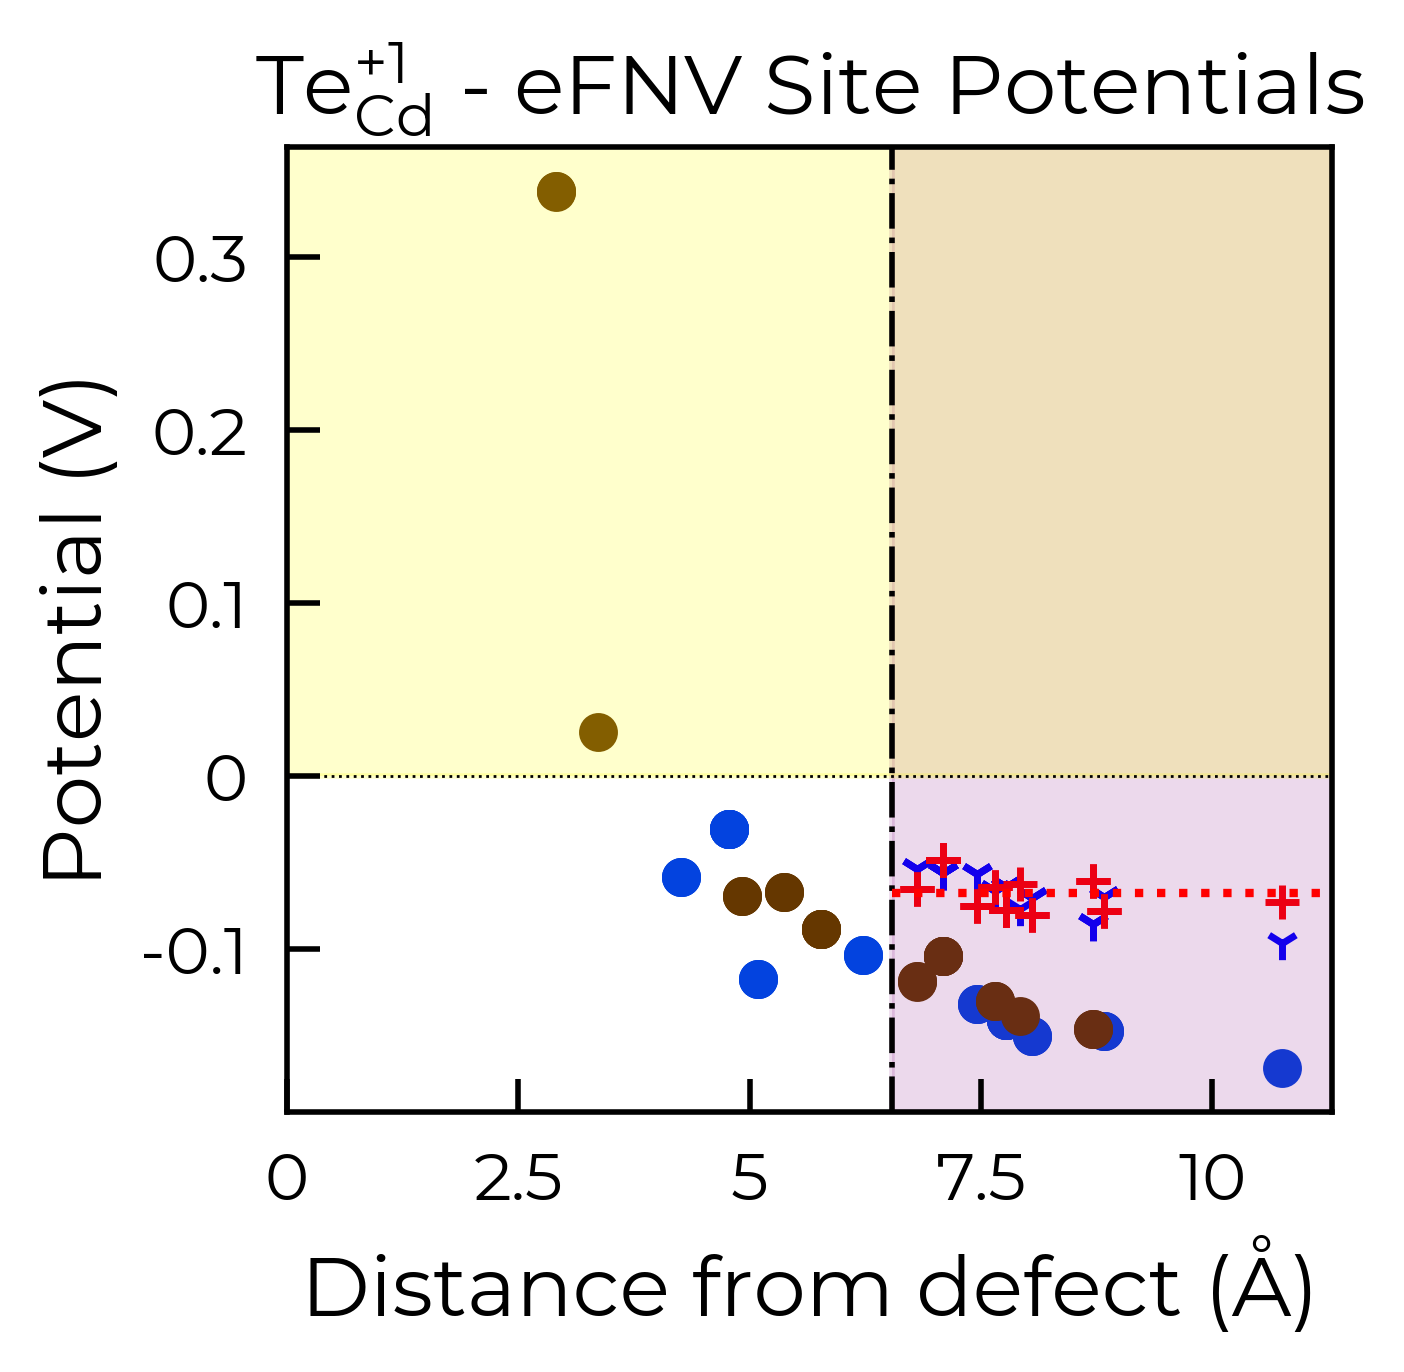

In [4]:
correction, plot = te_cd_entry.get_kumagai_correction(plot=True)
ax = plot.gca()  # get axis object
ax.get_legend().remove()  # remove legend
ax.axhspan(0, 100, alpha=0.2, color="yellow")

### `style_file`

As with the defect formation energy plots, we can adjust the overall style of the plot by using a custom `matplotlib` style (`mplstyle`) file:

In [5]:
with open("custom_style.mplstyle", "w") as f:
    f.write("ytick.right : True\nxtick.top : True\nfont.sans-serif : Helvetica")

Calculated Kumagai (eFNV) correction is 0.238 eV


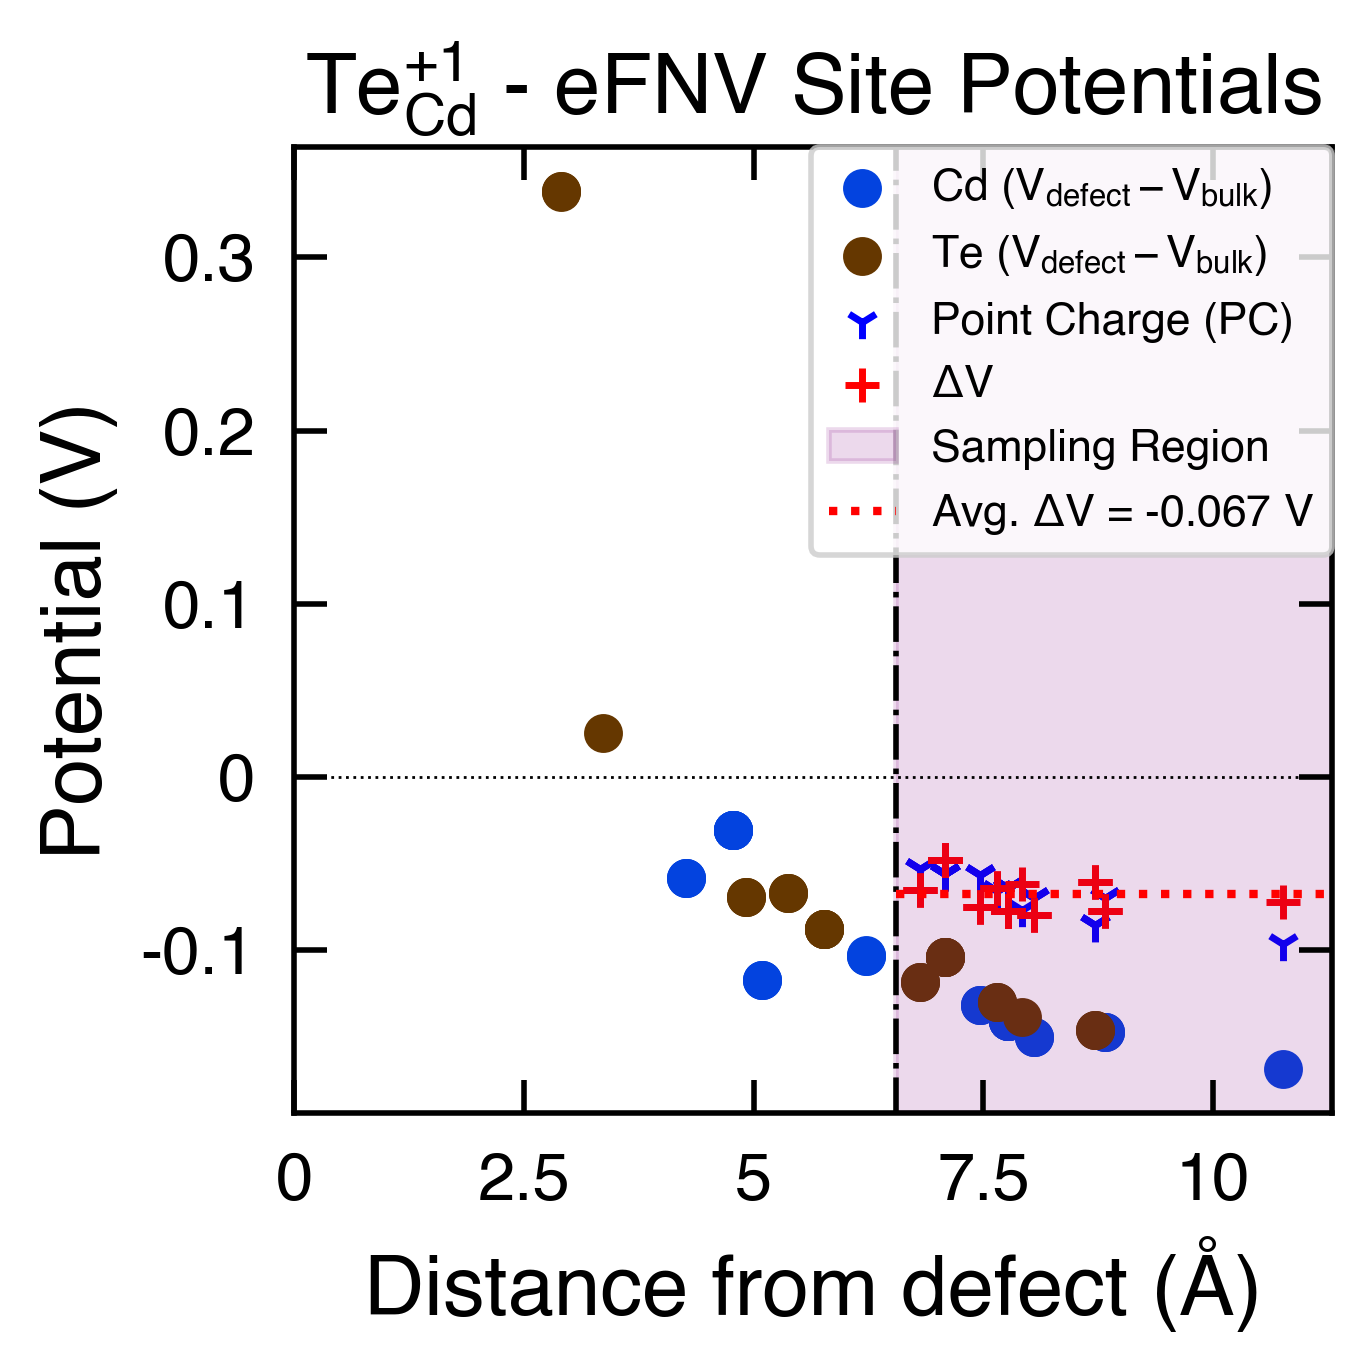

In [6]:
correction, plot = te_cd_entry.get_kumagai_correction(plot=True, style_file="custom_style.mplstyle")  

### FNV (Freysoldt) Correction
Remember, the Freysoldt (FNV) correction is only valid for isotropic systems!

In [2]:
v_cd_entry = [entry for entry in CdTe_thermo.defect_entries if entry.name == "v_Cd_-2"][0]

Calculated Freysoldt (FNV) correction is 0.738 eV


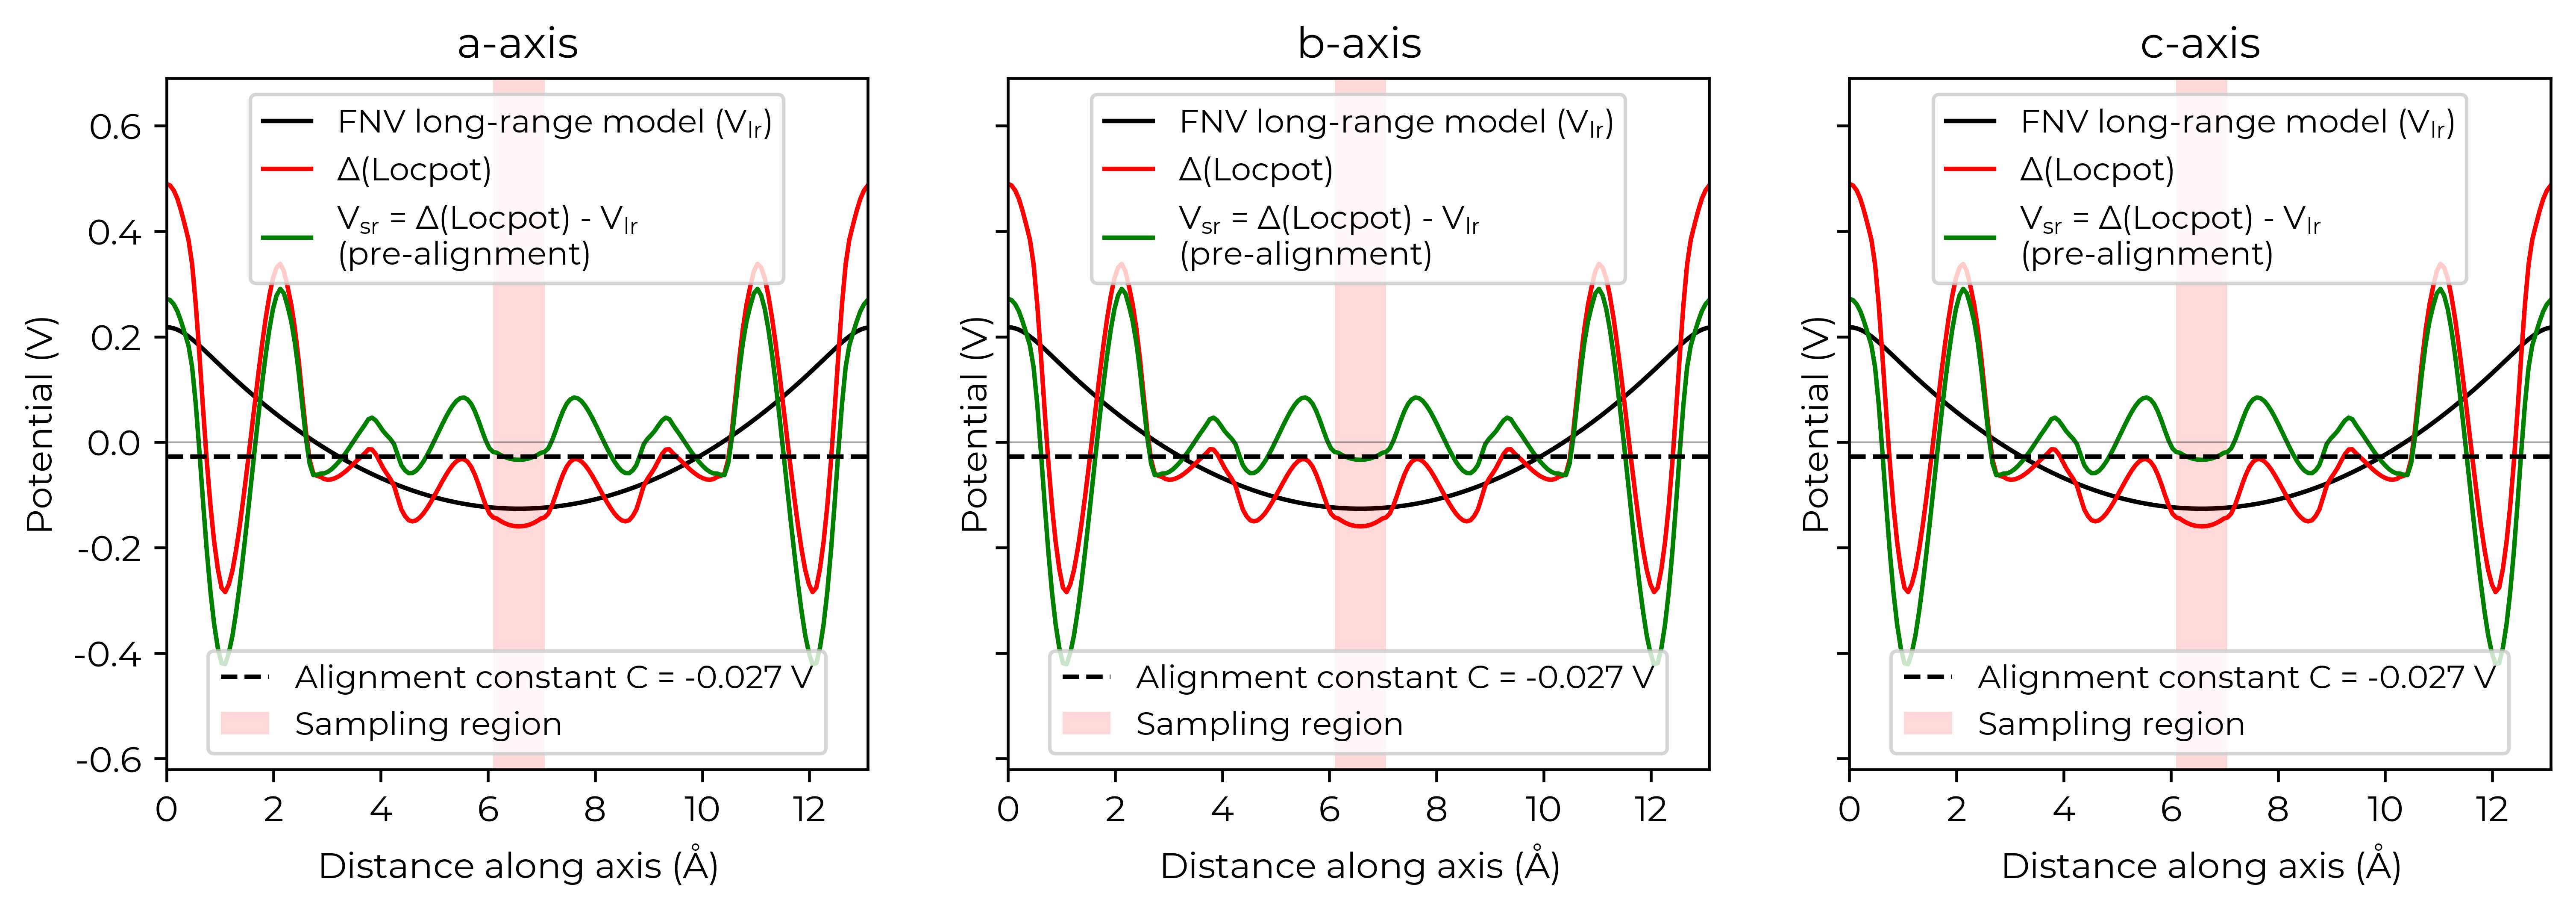

In [3]:
correction, plot = v_cd_entry.get_freysoldt_correction(plot=True)

For the FNV correction, it calculates the electrostatic potential alignment along the _a_, _b_ and _c_ axes and then computes the average. We can focus on just one axis at a time by setting `axis`:

Calculated Freysoldt (FNV) correction is 0.738 eV


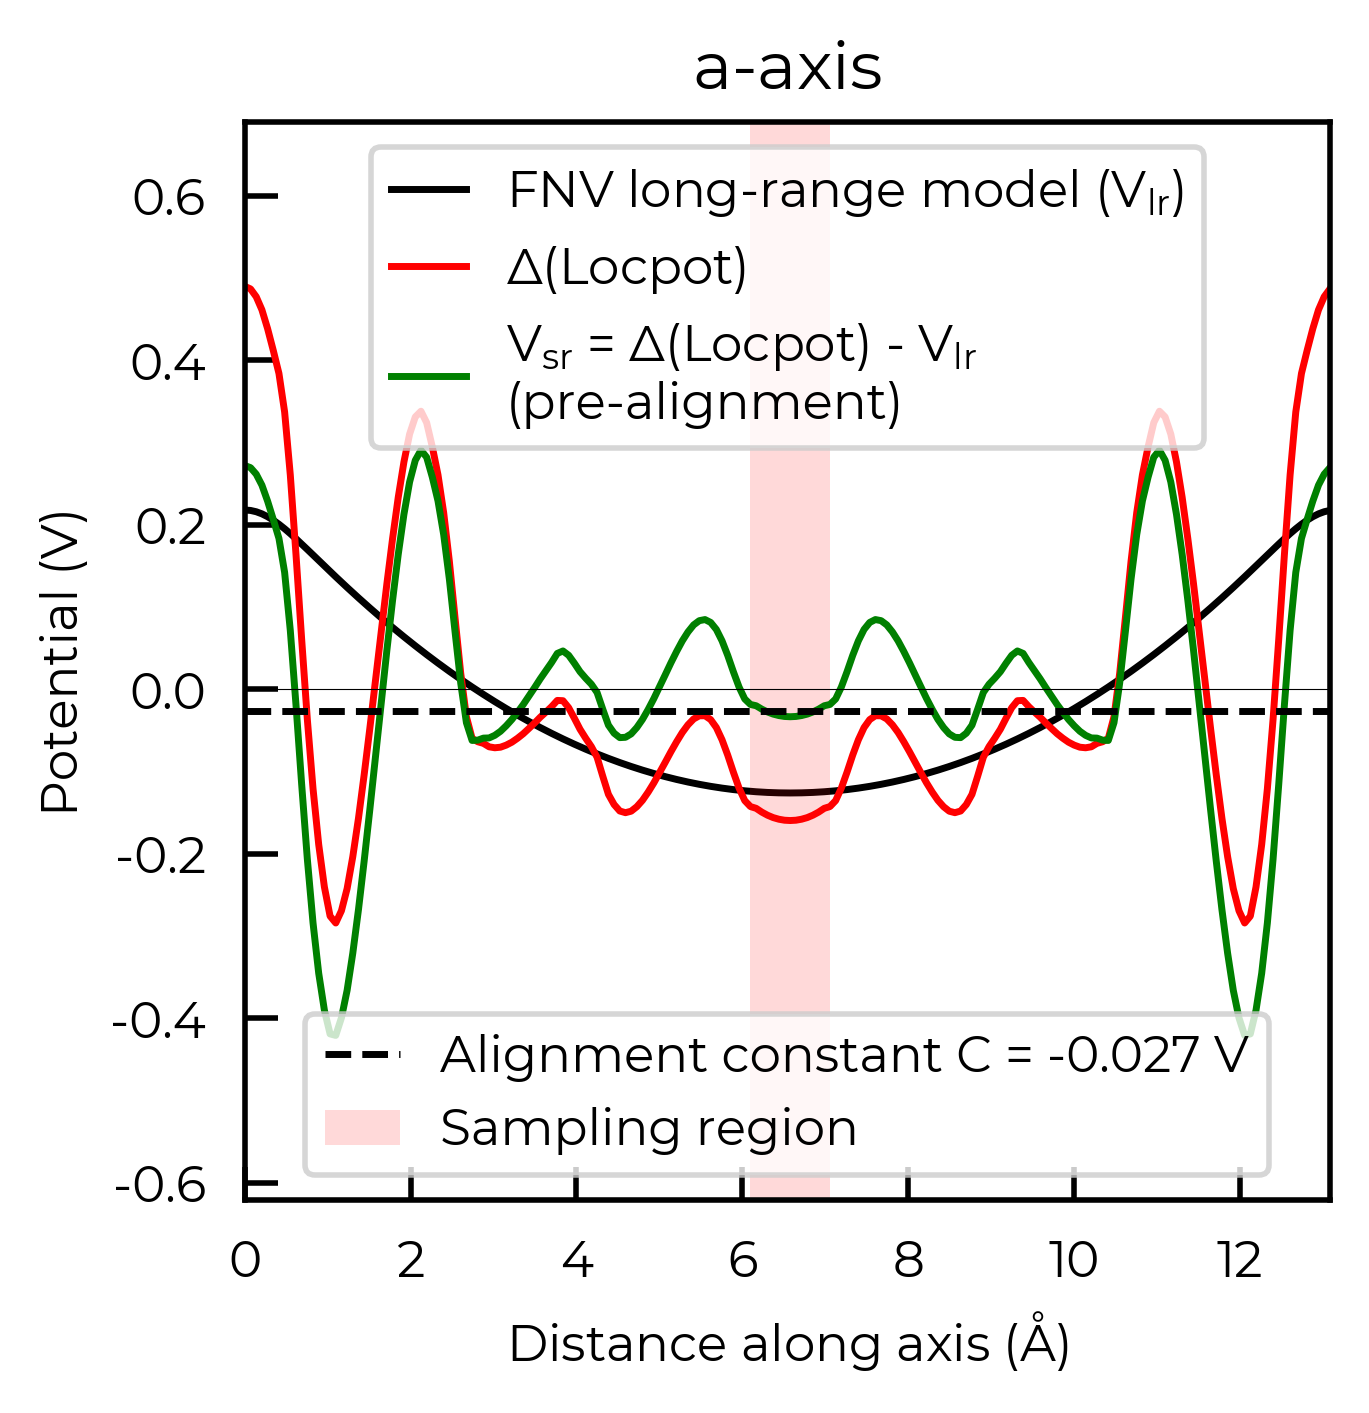

In [5]:
correction_a, plot_a = v_cd_entry.get_freysoldt_correction(plot=True, axis=0)

Again, because this function also returns the `Matplotlib` `Figure` object, we can further customise the plot as we see fit. To illustrate, here we remove the legends from each plot and shade the region where the potential is positive in yellow:

Calculated Freysoldt (FNV) correction is 0.738 eV


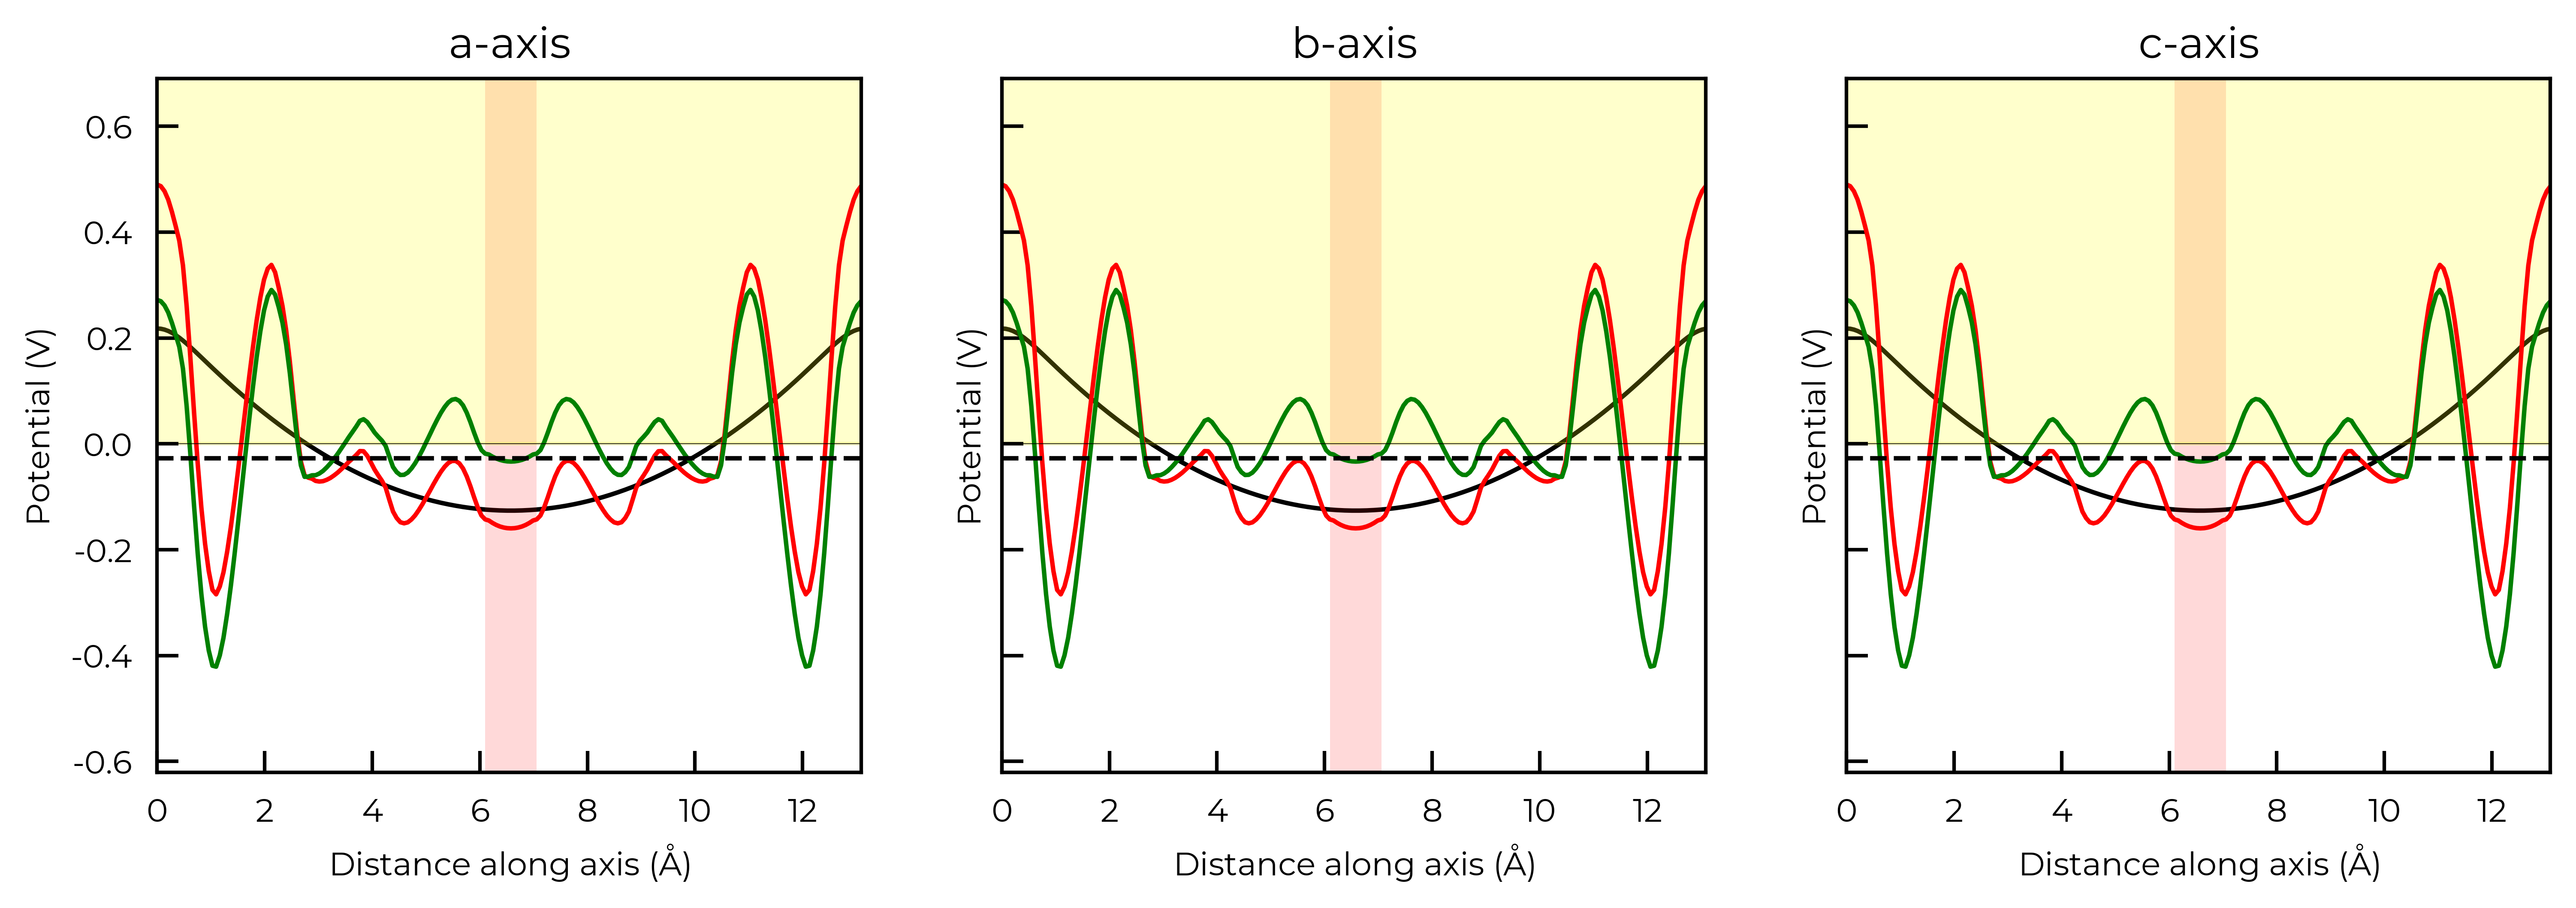

In [14]:
correction, plot = v_cd_entry.get_freysoldt_correction(plot=True)
for ax in plot.get_axes():
    ax.get_legend().remove()  # remove legend
    ax.artists[0].remove()  # shade the region where the potential is positive
    ax.axhspan(0, 100, alpha=0.2, color="yellow")

### `style_file`

As with the defect formation energy plots, we can adjust the overall style of the plot by using a custom `matplotlib` style (`mplstyle`) file:

In [15]:
with open("custom_style.mplstyle", "w") as f:
    f.write("ytick.right : True\nxtick.top : True\nfont.sans-serif : Helvetica")

Calculated Freysoldt (FNV) correction is 0.738 eV


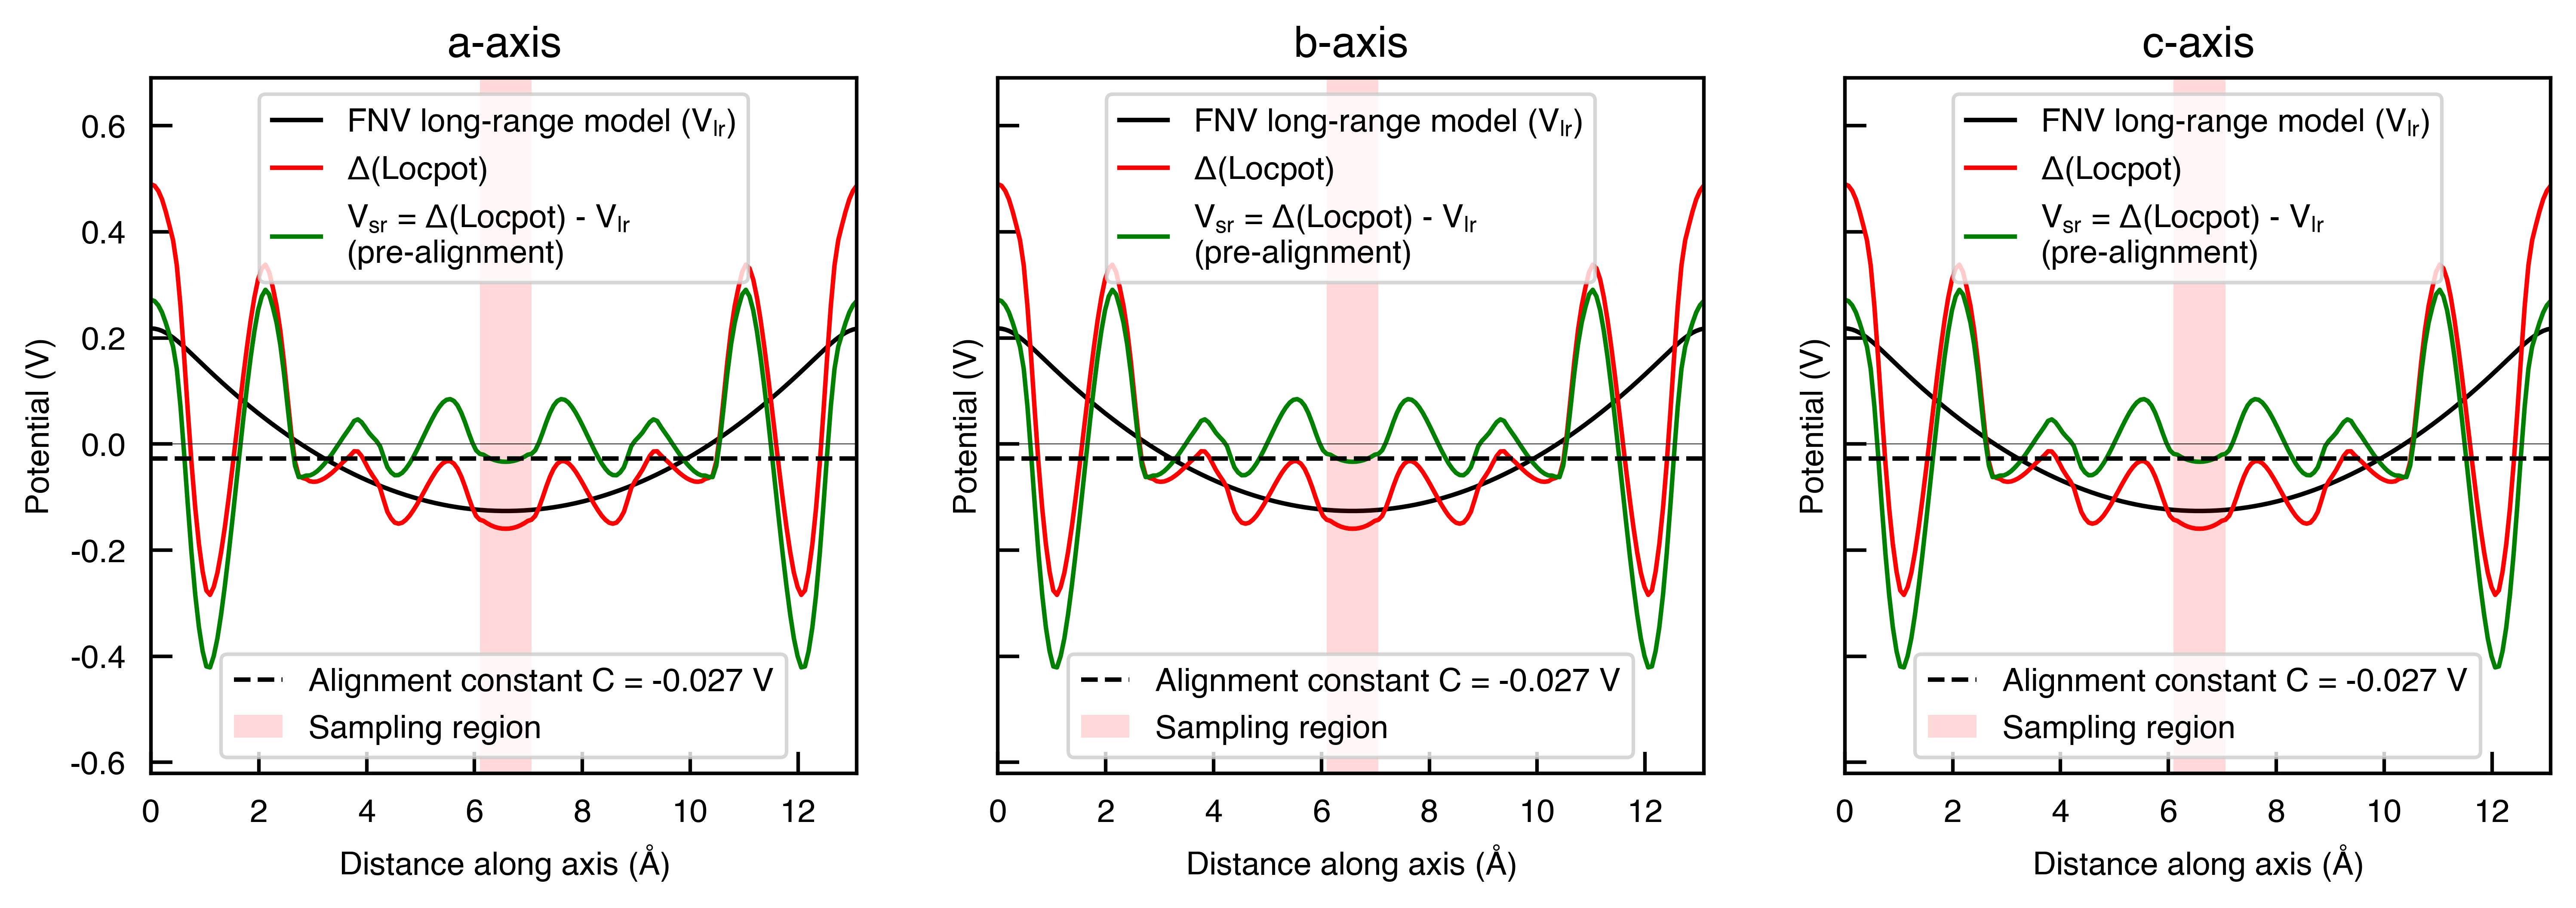

In [16]:
correction, plot = v_cd_entry.get_freysoldt_correction(plot=True, style_file="custom_style.mplstyle")  